In [1]:
import numpy as np
import math
import scipy as sp
from scipy import linalg
import pandas as pd
import matplotlib.pyplot as plt
import sympy

In [2]:
sp.info(sp.linalg.solve)

 solve(a, b, sym_pos=False, lower=False, overwrite_a=False, overwrite_b=False,
       debug=None, check_finite=True, assume_a='gen', transposed=False)

Solves the linear equation set ``a * x = b`` for the unknown ``x``
for square ``a`` matrix.

If the data matrix is known to be a particular type then supplying the
corresponding string to ``assume_a`` key chooses the dedicated solver.
The available options are

===================  ========
 generic matrix       'gen'
 symmetric            'sym'
 hermitian            'her'
 positive definite    'pos'
===================  ========

If omitted, ``'gen'`` is the default structure.

The datatype of the arrays define which solver is called regardless
of the values. In other words, even when the complex array entries have
precisely zero imaginary parts, the complex solver will be called based
on the data type of the array.

Parameters
----------
a : (N, N) array_like
    Square input data
b : (N, NRHS) array_like
    Input data for the right 

In [3]:
sp.source(sp.linalg.lu)

In file: /home/me/anaconda3/lib/python3.6/site-packages/scipy/linalg/decomp_lu.py

def lu(a, permute_l=False, overwrite_a=False, check_finite=True):
    """
    Compute pivoted LU decomposition of a matrix.

    The decomposition is::

        A = P L U

    where P is a permutation matrix, L lower triangular with unit
    diagonal elements, and U upper triangular.

    Parameters
    ----------
    a : (M, N) array_like
        Array to decompose
    permute_l : bool, optional
        Perform the multiplication P*L  (Default: do not permute)
    overwrite_a : bool, optional
        Whether to overwrite data in a (may improve performance)
    check_finite : bool, optional
        Whether to check that the input matrix contains only finite numbers.
        Disabling may give a performance gain, but may result in problems
        (crashes, non-termination) if the inputs do contain infinities or NaNs.

    Returns
    -------
    **(If permute_l == False)**

    p : (M, M) ndarray
       

In [4]:
dir(sp.linalg)

['LinAlgError',
 'Tester',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_decomp_polar',
 '_decomp_qz',
 '_decomp_update',
 '_expm_frechet',
 '_fblas',
 '_flapack',
 '_flinalg',
 '_matfuncs_sqrtm',
 '_procrustes',
 '_solve_toeplitz',
 '_solvers',
 'absolute_import',
 'basic',
 'blas',
 'block_diag',
 'cho_factor',
 'cho_solve',
 'cho_solve_banded',
 'cholesky',
 'cholesky_banded',
 'circulant',
 'companion',
 'coshm',
 'cosm',
 'cython_blas',
 'cython_lapack',
 'decomp',
 'decomp_cholesky',
 'decomp_lu',
 'decomp_qr',
 'decomp_schur',
 'decomp_svd',
 'det',
 'dft',
 'diagsvd',
 'division',
 'eig',
 'eig_banded',
 'eigh',
 'eigvals',
 'eigvals_banded',
 'eigvalsh',
 'expm',
 'expm2',
 'expm3',
 'expm_cond',
 'expm_frechet',
 'find_best_blas_type',
 'flinalg',
 'fractional_matrix_power',
 'funm',
 'get_blas_funcs',
 'get_lapack_funcs',
 'hadamard',
 'hankel',
 'helmert',
 'hesse

# Matrix Creation

In [5]:
a = np.empty((4,5))
a

array([[  6.93542489e-310,   2.13381972e-316,   6.93538267e-310,
          6.93542578e-310,   6.93538762e-310],
       [  6.93542582e-310,   6.93542582e-310,   6.93542582e-310,
          6.93538267e-310,   6.93540180e-310],
       [  6.93538751e-310,   4.00193173e-322,   2.12576764e-316,
          6.93542489e-310,   6.93542157e-310],
       [  6.93541501e-310,   6.93542583e-310,   6.93542143e-310,
          6.93541525e-310,   6.93538782e-310]])

In [6]:
A = np.zeros((3,4))
A

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [7]:
B = np.ones((4,2))
B

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [8]:
A = np.eye(3,3)
A

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [9]:
B = np.arange(9).reshape((3,3))
B

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [10]:
C = np.fromfunction(lambda x, y: x + y, (3,3))
C

array([[ 0.,  1.,  2.],
       [ 1.,  2.,  3.],
       [ 2.,  3.,  4.]])

In [11]:
fn = lambda x: math.sin(x)
vfn = np.vectorize(fn)
D = vfn(np.arange(9)).reshape(3,3)
D

array([[ 0.        ,  0.84147098,  0.90929743],
       [ 0.14112001, -0.7568025 , -0.95892427],
       [-0.2794155 ,  0.6569866 ,  0.98935825]])

In [12]:
fn2 = lambda x: np.sin(x)
D = fn2(np.arange(9)).reshape(3,3)
D

array([[ 0.        ,  0.84147098,  0.90929743],
       [ 0.14112001, -0.7568025 , -0.95892427],
       [-0.2794155 ,  0.6569866 ,  0.98935825]])

In [13]:
map1 = map(math.sin, np.arange(9))
E = np.fromiter(map1, dtype = 'float').reshape(3,3)
E

array([[ 0.        ,  0.84147098,  0.90929743],
       [ 0.14112001, -0.7568025 , -0.95892427],
       [-0.2794155 ,  0.6569866 ,  0.98935825]])

In [14]:
F = np.array([math.sin(x) for x in range(9)]).reshape(3,3)
F

array([[ 0.        ,  0.84147098,  0.90929743],
       [ 0.14112001, -0.7568025 , -0.95892427],
       [-0.2794155 ,  0.6569866 ,  0.98935825]])

## Time required in each 3x3 matrix creation

In [15]:
%%timeit -n 5
fn = lambda x: math.sin(x)
vfn = np.vectorize(fn)
D = vfn(np.arange(9)).reshape(3,3)

5 loops, best of 3: 28.7 µs per loop


In [16]:
%%timeit -n 5
fn2 = lambda x: np.sin(x)
D = fn2(np.arange(9)).reshape(3,3)

5 loops, best of 3: 5.22 µs per loop


In [17]:
%%timeit -n 5
map1 = map(math.sin, np.arange(9))
E = np.fromiter(map1, dtype = 'float').reshape(3,3)

5 loops, best of 3: 8.61 µs per loop


In [18]:
%%timeit -n 5
F = np.array([math.sin(x) for x in range(9)]).reshape(3,3)

5 loops, best of 3: 3.41 µs per loop


## Time required to create 100 x 100 matrix
Note: Numpy can has some overhead costs. Yet, applying numpy function to numpy array directly is fast for large matrix. (faster than vectorize non-numpy function / map non-numpy function / array of list comprehension)

In [19]:
%%timeit -n 5
fn = lambda x: math.sin(x)
vfn = np.vectorize(fn)
D = vfn(np.arange(10000)).reshape(100,100)

5 loops, best of 3: 2.82 ms per loop


In [20]:
%%timeit -n 5
fn2 = lambda x: np.sin(x)
D = fn2(np.arange(10000)).reshape(100,100)

5 loops, best of 3: 290 µs per loop


In [21]:
%%timeit -n 5
map1 = map(math.sin, np.arange(10000))
E = np.fromiter(map1, dtype = 'float').reshape(100,100)

5 loops, best of 3: 1.39 ms per loop


In [22]:
%%timeit -n 5
F = np.array([math.sin(x) for x in range(10000)]).reshape(100,100)

5 loops, best of 3: 1.82 ms per loop


# Matrix Concatenation

In [23]:
A = np.eye(3,3)
B = np.zeros((3,3))
C = np.ones((3,3))

In [24]:
A

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [25]:
B

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [26]:
C

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [27]:
A + B # not for concatenation

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [28]:
np.concatenate([A,B,C])

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [29]:
np.vstack([A,B,C])

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [30]:
np.r_[A,B,C]

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [31]:
np.concatenate([A,B,C],axis = 1)

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.]])

In [32]:
np.hstack([A,B,C])

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.]])

In [33]:
np.c_[A,B,C]

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.]])

# Row Swapping

In [34]:
A = np.eye(4,4)
A

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [35]:
A[0], A[3] = A[3], A[0]  #does not swap!

In [36]:
A

array([[ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [37]:
A = np.eye(4,4)

In [38]:
A[0,:], A[3,:] = A[3,:], A[0,:] #does not swap either!

In [39]:
A

array([[ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [40]:
A = np.eye(4,4)
A[[0,3]]

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [41]:
A[[0,3]] = A[[3,0]]  #Will swap!
A

array([[ 0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.]])

# Column Swapping

In [42]:
A = np.arange(16).reshape((4,4))
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [43]:
A[:,[0,3]] = A[:,[3,0]]

In [44]:
A

array([[ 3,  1,  2,  0],
       [ 7,  5,  6,  4],
       [11,  9, 10,  8],
       [15, 13, 14, 12]])

# Matrix Expansion

In [45]:
A = np.eye(3,3)
A

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [46]:
A[:,:,np.newaxis]

array([[[ 1.],
        [ 0.],
        [ 0.]],

       [[ 0.],
        [ 1.],
        [ 0.]],

       [[ 0.],
        [ 0.],
        [ 1.]]])

In [47]:
A[:,np.newaxis,:]

array([[[ 1.,  0.,  0.]],

       [[ 0.,  1.,  0.]],

       [[ 0.,  0.,  1.]]])

In [48]:
A[np.newaxis,:,:]

array([[[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]]])

# Element by element operation

In [49]:
%%timeit -n 5
A = np.arange(100)
B = np.arange(100)
C = A * B

The slowest run took 4.87 times longer than the fastest. This could mean that an intermediate result is being cached.
5 loops, best of 3: 4.87 µs per loop


In [50]:
np.__version__

'1.13.1'

In [51]:
%%timeit -n 5
a = range(100)
b = range(100)
c = []
for i in range(len(a)):
    c.append(a[i]*b[i])

5 loops, best of 3: 27.2 µs per loop


In [52]:
A = np.arange(100)
B = np.arange(100)
C = A * B
C

array([   0,    1,    4,    9,   16,   25,   36,   49,   64,   81,  100,
        121,  144,  169,  196,  225,  256,  289,  324,  361,  400,  441,
        484,  529,  576,  625,  676,  729,  784,  841,  900,  961, 1024,
       1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849,
       1936, 2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809, 2916,
       3025, 3136, 3249, 3364, 3481, 3600, 3721, 3844, 3969, 4096, 4225,
       4356, 4489, 4624, 4761, 4900, 5041, 5184, 5329, 5476, 5625, 5776,
       5929, 6084, 6241, 6400, 6561, 6724, 6889, 7056, 7225, 7396, 7569,
       7744, 7921, 8100, 8281, 8464, 8649, 8836, 9025, 9216, 9409, 9604,
       9801])

In [53]:
a = range(100)
b = range(100)
c = []
for i in range(len(a)):
    c.append(a[i]*b[i])
c

[0,
 1,
 4,
 9,
 16,
 25,
 36,
 49,
 64,
 81,
 100,
 121,
 144,
 169,
 196,
 225,
 256,
 289,
 324,
 361,
 400,
 441,
 484,
 529,
 576,
 625,
 676,
 729,
 784,
 841,
 900,
 961,
 1024,
 1089,
 1156,
 1225,
 1296,
 1369,
 1444,
 1521,
 1600,
 1681,
 1764,
 1849,
 1936,
 2025,
 2116,
 2209,
 2304,
 2401,
 2500,
 2601,
 2704,
 2809,
 2916,
 3025,
 3136,
 3249,
 3364,
 3481,
 3600,
 3721,
 3844,
 3969,
 4096,
 4225,
 4356,
 4489,
 4624,
 4761,
 4900,
 5041,
 5184,
 5329,
 5476,
 5625,
 5776,
 5929,
 6084,
 6241,
 6400,
 6561,
 6724,
 6889,
 7056,
 7225,
 7396,
 7569,
 7744,
 7921,
 8100,
 8281,
 8464,
 8649,
 8836,
 9025,
 9216,
 9409,
 9604,
 9801]

# Matrix - Matrix Multiplication

Time for numpy

In [54]:
%%timeit -n 5
A = np.array([[1,2],[3,4]])
np.dot(A,A)

5 loops, best of 3: 3.63 µs per loop


In [55]:
A = np.array([[1,2],[3,4]])
np.dot(A,A)

array([[ 7, 10],
       [15, 22]])

In [56]:
A.dot(A)

array([[ 7, 10],
       [15, 22]])

Time with no direct multiplication function

In [57]:
%%timeit -n 5
B = [[1,2],[3,4]]
C = []
for i in range(2):
    C.append([])
    for j in range(2):
        sum = 0
        for k in range(2):
            sum = sum + B[i][k] * B[k][j]
        C[i].append(sum)

5 loops, best of 3: 3.6 µs per loop


In [58]:
B = [[1,2],[3,4]]
C = []
for i in range(2):
    C.append([])
    for j in range(2):
        sum = 0
        for k in range(2):
            sum = sum + B[i][k] * B[k][j]
        C[i].append(sum)

#printing part
N = 2
print('[', end = '')
for i in range(N):
    if i != 0:
        print(' ', end = '')
    print('[', end = '')
    for j in range(N):
        print('{:2d}'.format(C[i][j]), end = '')
        if j != N-1:
            print(', ', end = '')
    print(']', end = '')
    if i != N-1:
        print(',')
print(']', end = '')

[[ 7, 10],
 [15, 22]]

4 x 4 Matrix Multiplication

In [59]:
np.random.seed(1)
A = np.ceil(10*np.random.random((4,4)))
np.random.seed(2)
B = np.ceil(10*np.random.random((4,4)))
print('A = ')
print(A, end = '\n\n')
print('B = ')
print(B)

A = 
[[ 5.  8.  1.  4.]
 [ 2.  1.  2.  4.]
 [ 4.  6.  5.  7.]
 [ 3.  9.  1.  7.]]

B = 
[[ 5.  1.  6.  5.]
 [ 5.  4.  3.  7.]
 [ 3.  3.  7.  6.]
 [ 2.  6.  2.  8.]]


In [60]:
np.dot(A,B)

array([[  76.,   64.,   69.,  119.],
       [  29.,   36.,   37.,   61.],
       [  79.,   85.,   91.,  148.],
       [  77.,   84.,   66.,  140.]])

In [61]:
ans = np.zeros((4,4))
for i in range(4):
    for j in range(4):
        sum = 0
        for k in range(4):
            sum = sum + A[i,k] * B[k,j]
        ans[i,j] = sum
ans

array([[  76.,   64.,   69.,  119.],
       [  29.,   36.,   37.,   61.],
       [  79.,   85.,   91.,  148.],
       [  77.,   84.,   66.,  140.]])

Pythonic way for matrix multiplication

In [62]:
%%timeit -n 5
np.dot(A,B)

The slowest run took 54.15 times longer than the fastest. This could mean that an intermediate result is being cached.
5 loops, best of 3: 1.36 µs per loop


non-Pythonic way for matrix multiplication

In [63]:
%%timeit -n 5
ans = np.zeros((4,4))
for i in range(4):
    for j in range(4):
        sum = 0
        for k in range(4):
            sum = sum + A[i,k] * B[k,j]
        ans[i,j] = sum
ans

5 loops, best of 3: 32.8 µs per loop


# Gaussian Elimination

In [64]:
np.random.seed(2)
a = np.ceil(10*np.random.random((4,4)))
a

array([[ 5.,  1.,  6.,  5.],
       [ 5.,  4.,  3.,  7.],
       [ 3.,  3.,  7.,  6.],
       [ 2.,  6.,  2.,  8.]])

In [65]:
b = np.floor(10*np.random.random((4,1)))
b

array([[ 8.],
       [ 4.],
       [ 8.],
       [ 0.]])

In [66]:
A = np.hstack((a,b))
A

array([[ 5.,  1.,  6.,  5.,  8.],
       [ 5.,  4.,  3.,  7.,  4.],
       [ 3.,  3.,  7.,  6.,  8.],
       [ 2.,  6.,  2.,  8.,  0.]])

In [67]:
A.shape[0]

4

### Use: &nbsp; $L_{ij}^{new} = \left[L_{ij} - \frac{L_{ik}}{L_{kk}} L_{kj}\right]^{old}$

In [68]:
N = A.shape[0]
for k in range(N-1):
    for i in range(k+1, N):
        r = -A[i,k] / A[k,k]
        for j in range(k+1, N+1):
            A[i,j] = A[i,j] + r * A[k,j]
        #lines below are not used during back substitution
        for j in range(k+1):
            A[i,j] = 0

In [69]:
A

array([[ 5.        ,  1.        ,  6.        ,  5.        ,  8.        ],
       [ 0.        ,  3.        , -3.        ,  2.        , -4.        ],
       [ 0.        ,  0.        ,  5.8       ,  1.4       ,  6.4       ],
       [ 0.        ,  0.        ,  0.        ,  1.01149425, -1.47126437]])

# Back Substitution: &nbsp; $x_i = \frac{a_{im} - \sum_{j=i+1}^n a_{ij}x_j}{a_{ii}}$

In [70]:
#For ax = b
# A = np.hstack((a,b))
A[N-1,N] = A[N-1,-1] / A[N-1, -2]
for i in range(N-2, -1, -1): #2, 1, 0
    sum = 0
    for j in range(i+1, N): #i+1 to N-1
        sum = sum + A[i,j] * A[j,N]
    A[i,N] = (A[i,N] - sum)/A[i,i]
A[:,N]

array([ 1.09090909,  1.09090909,  1.45454545, -1.45454545])

In [71]:
ans = A[:,N]
ans

array([ 1.09090909,  1.09090909,  1.45454545, -1.45454545])

In [72]:
ans = ans[:,np.newaxis]
ans

array([[ 1.09090909],
       [ 1.09090909],
       [ 1.45454545],
       [-1.45454545]])

## Check answer Ax = b, by calculating A* ans

In [73]:
np.dot(a,ans)

array([[ 8.],
       [ 4.],
       [ 8.],
       [ 0.]])

In [74]:
b

array([[ 8.],
       [ 4.],
       [ 8.],
       [ 0.]])

### Answer from Scipy

In [75]:
sp.__version__

'0.19.1'

In [76]:
ans_sp = linalg.solve(a,b)
ans_sp

array([[ 1.09090909],
       [ 1.09090909],
       [ 1.45454545],
       [-1.45454545]])

In [77]:
ans - ans_sp

array([[  2.22044605e-16],
       [ -6.66133815e-16],
       [ -2.22044605e-16],
       [  4.44089210e-16]])

In [78]:
a.dot(ans) - b

array([[  0.00000000e+00],
       [ -8.88178420e-16],
       [ -1.77635684e-15],
       [  0.00000000e+00]])

In [79]:
a.dot(ans_sp) - b

array([[ -1.77635684e-15],
       [ -3.55271368e-15],
       [ -1.77635684e-15],
       [ -1.77635684e-15]])

### Up-scaling to 10 x 10

In [80]:
def user_gaussian_solve(a,b):
    A = np.hstack((a,b))
    N = A.shape[0]
    for k in range(N-1):
        for i in range(k+1, N):
            r = -A[i,k] / A[k,k]
            for j in range(k+1, N+1):
                A[i,j] = A[i,j] + r * A[k,j]
            #lines below are not used during back substitution
    A[N-1,N] = A[N-1,-1] / A[N-1, -2]
    for i in range(N-2, -1, -1): #2, 1, 0
        sum = 0
        for j in range(i+1, N): #i+1 to N-1
            sum = sum + A[i,j] * A[j,N]
        A[i,N] = (A[i,N] - sum)/A[i,i]
    return A[:,N][:,np.newaxis]

In [81]:
x = user_gaussian_solve(a,b)
a.dot(x) - b

array([[  0.00000000e+00],
       [ -8.88178420e-16],
       [ -1.77635684e-15],
       [  0.00000000e+00]])

In [82]:
x

array([[ 1.09090909],
       [ 1.09090909],
       [ 1.45454545],
       [-1.45454545]])

In [83]:
np.random.seed(2)
a = np.ceil(10*np.random.random((10,10)))
a

array([[  5.,   1.,   6.,   5.,   5.,   4.,   3.,   7.,   3.,   3.],
       [  7.,   6.,   2.,   6.,   2.,   8.,   9.,   5.,   9.,   1.],
       [  6.,   1.,   5.,   1.,   2.,   6.,   3.,   2.,   3.,   4.],
       [  5.,   3.,   7.,   5.,   6.,   4.,   8.,   6.,   2.,   8.],
       [ 10.,   6.,   9.,   4.,   6.,   5.,   5.,   8.,   6.,  10.],
       [  6.,   1.,   4.,   9.,   5.,   1.,   3.,   1.,  10.,  10.],
       [  9.,   7.,   8.,   2.,   3.,   6.,   4.,   1.,  10.,   5.],
       [  6.,   4.,   3.,   4.,   9.,   8.,   4.,   1.,   8.,   3.],
       [  6.,   1.,   7.,   4.,   5.,   5.,   4.,   6.,  10.,   2.],
       [  4.,   1.,   8.,   7.,   3.,   5.,   7.,   7.,   2.,   9.]])

In [84]:
b = np.ceil(10*np.random.random((10,1)))
b

array([[  8.],
       [  2.],
       [  9.],
       [  8.],
       [  8.],
       [  6.],
       [  3.],
       [ 10.],
       [  6.],
       [  4.]])

In [85]:
x = user_gaussian_solve(a,b)
a.dot(x) - b

array([[  1.77635684e-15],
       [  2.66453526e-15],
       [  1.77635684e-15],
       [  0.00000000e+00],
       [  0.00000000e+00],
       [ -8.88178420e-16],
       [ -4.44089210e-16],
       [ -3.37507799e-14],
       [  1.77635684e-15],
       [  8.88178420e-15]])

In [86]:
x

array([[ 2.07221037],
       [-1.39430277],
       [-0.12657769],
       [-0.01830467],
       [ 1.07867709],
       [-0.07065234],
       [ 0.4425574 ],
       [-0.48488272],
       [-0.7342585 ],
       [-0.31908441]])

In [87]:
x2 = linalg.solve(a,b)
a.dot(x2) - b

array([[  0.00000000e+00],
       [ -8.88178420e-16],
       [  0.00000000e+00],
       [  1.77635684e-15],
       [  3.55271368e-15],
       [ -8.88178420e-16],
       [  4.88498131e-15],
       [ -1.77635684e-15],
       [ -1.77635684e-15],
       [ -8.88178420e-16]])

In [88]:
x2

array([[ 2.07221037],
       [-1.39430277],
       [-0.12657769],
       [-0.01830467],
       [ 1.07867709],
       [-0.07065234],
       [ 0.4425574 ],
       [-0.48488272],
       [-0.7342585 ],
       [-0.31908441]])

In [89]:
%%timeit -n 5
user_gaussian_solve(a,b)

5 loops, best of 3: 208 µs per loop


In [90]:
%%timeit -n 5
linalg.solve(a,b)

5 loops, best of 3: 59.7 µs per loop


# Partial Pivoting: max( abs(diagonal)) on each step of elimination
Find the maximum value that is on the same column as the pivot element, then swap

In [91]:
np.random.seed(1)
a2 = np.ceil(10*np.random.random((4,4)))
a2[3,:] = a2[3,:] * 10000
a2

array([[  5.00000000e+00,   8.00000000e+00,   1.00000000e+00,
          4.00000000e+00],
       [  2.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          4.00000000e+00],
       [  4.00000000e+00,   6.00000000e+00,   5.00000000e+00,
          7.00000000e+00],
       [  3.00000000e+04,   9.00000000e+04,   1.00000000e+04,
          7.00000000e+04]])

In [92]:
np.random.seed(1)
b2 = np.ceil(10*np.random.random((4,1)))
b2

array([[ 5.],
       [ 8.],
       [ 1.],
       [ 4.]])

In [93]:
ans2 = user_gaussian_solve(a2,b2)

In [94]:
a2.dot(ans2) - b2

array([[  1.77635684e-15],
       [  0.00000000e+00],
       [  1.77635684e-15],
       [  1.45519152e-11]])

In [95]:
ans2b = linalg.solve(a2,b2)

In [96]:
a2.dot(ans2b) - b2

array([[  8.88178420e-16],
       [  0.00000000e+00],
       [ -5.32907052e-15],
       [ -5.82076609e-11]])

In [97]:
np.random.seed(1)
a2 = np.floor(10*np.random.random((10,10))) - 6
a2[0,0] = 0

In [98]:
a2

array([[ 0.,  1., -6., -3., -5., -6., -5., -3., -3., -1.],
       [-2.,  0., -4.,  2., -6.,  0., -2., -1., -5., -5.],
       [ 2.,  3., -3.,  0.,  2.,  2., -6., -6., -5.,  2.],
       [-6., -2.,  3., -1.,  0., -3.,  0.,  2., -6.,  1.],
       [ 3.,  1., -4.,  1., -5., -2.,  3., -4., -4., -5.],
       [-6.,  0., -4., -4., -2., -6., -1., -5., -1.,  0.],
       [-5., -2.,  0., -2., -6., -1.,  0., -1.,  3., -1.],
       [ 3., -5., -5.,  2., -3., -5.,  3., -3.,  1.,  1.],
       [ 2.,  0.,  1., -3., -4.,  2., -2.,  3.,  0.,  0.],
       [-5.,  3., -2., -1., -2., -4.,  3., -1., -6.,  0.]])

In [99]:
b

array([[  8.],
       [  2.],
       [  9.],
       [  8.],
       [  8.],
       [  6.],
       [  3.],
       [ 10.],
       [  6.],
       [  4.]])

In [100]:
linalg.solve(a2,b)

array([[ 0.77432279],
       [-1.39446307],
       [ 0.61638638],
       [-1.23315046],
       [-1.0049791 ],
       [ 0.19168532],
       [ 0.28772884],
       [-1.2307709 ],
       [-1.45290852],
       [ 1.09384768]])

In [101]:
user_gaussian_solve(a2,b)

/home/me/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/me/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


array([[ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan]])

### Get "<font color=#FF0000> Not A Number </font>" (nan) because of zeros in the diagonal terms 

In [102]:
def user_gaussian_solve_pp(a,b):
    A = np.hstack((a,b))
    N = A.shape[0]
    for k in range(N-1):
        maxidx = np.abs(A[k:,k]).argmax() + k #get index of the max arg
        # +k is needed, because, argmax restart at 0 for the new slice
        A[[k,maxidx]] = A[[maxidx, k]]
        for i in range(k+1, N):
            r = -A[i,k] / A[k,k]
            for j in range(k+1, N+1):
                A[i,j] = A[i,j] + r * A[k,j]

    A[N-1,N] = A[N-1,-1] / A[N-1, -2]
    for i in range(N-2, -1, -1): #2, 1, 0
        sum = 0
        for j in range(i+1, N): #i+1 to N-1
            sum = sum + A[i,j] * A[j,N]
        A[i,N] = (A[i,N] - sum)/A[i,i]
    return A[:,N][:,np.newaxis]

In [103]:
ans = user_gaussian_solve_pp(a2,b)
ans

array([[ 0.77432279],
       [-1.39446307],
       [ 0.61638638],
       [-1.23315046],
       [-1.0049791 ],
       [ 0.19168532],
       [ 0.28772884],
       [-1.2307709 ],
       [-1.45290852],
       [ 1.09384768]])

In [104]:
err_usr = a2.dot(ans)-b
err_usr

array([[ -2.66453526e-15],
       [  0.00000000e+00],
       [ -3.55271368e-15],
       [  0.00000000e+00],
       [  1.77635684e-15],
       [ -2.66453526e-15],
       [  0.00000000e+00],
       [ -1.77635684e-15],
       [  8.88178420e-16],
       [  5.32907052e-15]])

In [105]:
ans_sp = linalg.solve(a2,b)
err_sp = a2.dot(ans_sp)-b
err_sp

array([[  0.00000000e+00],
       [  8.88178420e-16],
       [  0.00000000e+00],
       [  0.00000000e+00],
       [  1.77635684e-15],
       [  0.00000000e+00],
       [  2.66453526e-15],
       [  0.00000000e+00],
       [  8.88178420e-16],
       [  2.66453526e-15]])

In [106]:
ans_sp

array([[ 0.77432279],
       [-1.39446307],
       [ 0.61638638],
       [-1.23315046],
       [-1.0049791 ],
       [ 0.19168532],
       [ 0.28772884],
       [-1.2307709 ],
       [-1.45290852],
       [ 1.09384768]])

In [107]:
print('err scipy', np.linalg.norm(err_sp))
print('err user ', np.linalg.norm(err_usr))

err scipy 4.35116785763e-15
err user  7.89430247156e-15


# Checking the condition number of A (square matrix)
well conditioned: 1
<br>ill conditioned: very large number
## For Ax = b, if x change a little (contain a little error), what will happen to b
## $A(x+\delta x) = b + \delta b$
## $A \delta x = \delta b$
## $\frac{\|\delta x\|}{\|x\|} = \frac{\|A^{-1}\delta b\|}{\|x\|} <= \frac{\|A^{-1}\|\|\delta b\|}{\|x\|}$
## $\frac{\|A^{-1}\|\|\delta b\|}{\|x\|} \cdot \frac{\|b\|}{\|b\|} =
\frac{\|A^{-1}\|\| b\|}{\|x\|} \cdot \frac{\| \delta b\|}{\|b\|} = \|A^{-1}\|\cdot\|A\|\cdot \frac{\| \delta b\|}{\|b\|}$
## $\therefore \; \frac{\|\delta x\|}{\|x\|} <= \|A^{-1}\|\cdot\|A\|\cdot \frac{\| \delta b\|}{\|b\|}$
## $\|A^{-1}\|\cdot\|A\|$ is the condition number of matrix A
### The relative error in x (answer) is bounded by the relative error in b * condition number

In [108]:
a2

array([[ 0.,  1., -6., -3., -5., -6., -5., -3., -3., -1.],
       [-2.,  0., -4.,  2., -6.,  0., -2., -1., -5., -5.],
       [ 2.,  3., -3.,  0.,  2.,  2., -6., -6., -5.,  2.],
       [-6., -2.,  3., -1.,  0., -3.,  0.,  2., -6.,  1.],
       [ 3.,  1., -4.,  1., -5., -2.,  3., -4., -4., -5.],
       [-6.,  0., -4., -4., -2., -6., -1., -5., -1.,  0.],
       [-5., -2.,  0., -2., -6., -1.,  0., -1.,  3., -1.],
       [ 3., -5., -5.,  2., -3., -5.,  3., -3.,  1.,  1.],
       [ 2.,  0.,  1., -3., -4.,  2., -2.,  3.,  0.,  0.],
       [-5.,  3., -2., -1., -2., -4.,  3., -1., -6.,  0.]])

In [109]:
np.linalg.cond(a2)

18.062377254421843

In [110]:
a

array([[  5.,   1.,   6.,   5.,   5.,   4.,   3.,   7.,   3.,   3.],
       [  7.,   6.,   2.,   6.,   2.,   8.,   9.,   5.,   9.,   1.],
       [  6.,   1.,   5.,   1.,   2.,   6.,   3.,   2.,   3.,   4.],
       [  5.,   3.,   7.,   5.,   6.,   4.,   8.,   6.,   2.,   8.],
       [ 10.,   6.,   9.,   4.,   6.,   5.,   5.,   8.,   6.,  10.],
       [  6.,   1.,   4.,   9.,   5.,   1.,   3.,   1.,  10.,  10.],
       [  9.,   7.,   8.,   2.,   3.,   6.,   4.,   1.,  10.,   5.],
       [  6.,   4.,   3.,   4.,   9.,   8.,   4.,   1.,   8.,   3.],
       [  6.,   1.,   7.,   4.,   5.,   5.,   4.,   6.,  10.,   2.],
       [  4.,   1.,   8.,   7.,   3.,   5.,   7.,   7.,   2.,   9.]])

In [111]:
np.linalg.cond(a)

40.145162515000834

In [112]:
c_num_test = a + 50 * np.eye((a.shape[0]))
c_num_test

array([[ 55.,   1.,   6.,   5.,   5.,   4.,   3.,   7.,   3.,   3.],
       [  7.,  56.,   2.,   6.,   2.,   8.,   9.,   5.,   9.,   1.],
       [  6.,   1.,  55.,   1.,   2.,   6.,   3.,   2.,   3.,   4.],
       [  5.,   3.,   7.,  55.,   6.,   4.,   8.,   6.,   2.,   8.],
       [ 10.,   6.,   9.,   4.,  56.,   5.,   5.,   8.,   6.,  10.],
       [  6.,   1.,   4.,   9.,   5.,  51.,   3.,   1.,  10.,  10.],
       [  9.,   7.,   8.,   2.,   3.,   6.,  54.,   1.,  10.,   5.],
       [  6.,   4.,   3.,   4.,   9.,   8.,   4.,  51.,   8.,   3.],
       [  6.,   1.,   7.,   4.,   5.,   5.,   4.,   6.,  60.,   2.],
       [  4.,   1.,   8.,   7.,   3.,   5.,   7.,   7.,   2.,  59.]])

In [113]:
np.linalg.cond(c_num_test,p='fro') # p = 'fro' is just to select Frobenius norm

11.250797180551318

## large diagonal term make it easier to get the answer, better accuracy (lower condition number)

In [114]:
np.linalg.norm(sp.linalg.inv(c_num_test)) * np.linalg.norm(c_num_test)

11.250797180551317

<font size = '4', style = "line-height:2">
Frobenius norm is defined as
<br>$\|A\|_{\rm F}=\sqrt{\sum_{i=1}^m\sum_{j=1}^n |a_{ij}|^2}=\sqrt{\operatorname{trace}(A^{\dagger}A)}$
<br> dagger is conjugate transpose (or just transpose for real number)
<br> trace is summation of the diagonal term

In [115]:
np.linalg.norm(c_num_test)

183.01639270841287

In [116]:
np.linalg.norm(sp.linalg.inv(c_num_test))

0.061474259294774868

In [117]:
for row in c_num_test:
    print(row)

[ 55.   1.   6.   5.   5.   4.   3.   7.   3.   3.]
[  7.  56.   2.   6.   2.   8.   9.   5.   9.   1.]
[  6.   1.  55.   1.   2.   6.   3.   2.   3.   4.]
[  5.   3.   7.  55.   6.   4.   8.   6.   2.   8.]
[ 10.   6.   9.   4.  56.   5.   5.   8.   6.  10.]
[  6.   1.   4.   9.   5.  51.   3.   1.  10.  10.]
[  9.   7.   8.   2.   3.   6.  54.   1.  10.   5.]
[  6.   4.   3.   4.   9.   8.   4.  51.   8.   3.]
[  6.   1.   7.   4.   5.   5.   4.   6.  60.   2.]
[  4.   1.   8.   7.   3.   5.   7.   7.   2.  59.]


In [118]:
#this is non-pythonic way.
#use just to show the direct calculation
sum_ = 0
for row in c_num_test:
    for i in row:
        sum_ = sum_ + i**2
sum_**0.5

183.01639270841287

In [119]:
#this is non-pythonic way.
#use just to show the direct calculation
sum_ = 0
for i in range(c_num_test.shape[0]):
    dia = c_num_test.dot(c_num_test.T)[i,i]
    sum_ += dia
sum_**0.5

183.01639270841287

## Condition number before and after partial pivoting is the same

In [120]:
def partial_pivoting(a):
    A = a.copy()
    N = A.shape[0]
    p = np.eye(N,N)
    for k in range(N-1):
        maxidx = np.abs(A[k:,k]).argmax() + k #get index of the max arg
        # +k is needed, because, argmax restart at 0 for the new slice
        if (k != maxidx):
            p[[k, maxidx]] = p[[maxidx, k]]
            A[[k, maxidx]] = A[[maxidx, k]]
    return A, p


In [121]:
np.random.seed(1)
a2 = np.floor(10*np.random.random((10,10))) - 6
a2[0,0] = 0
a2

array([[ 0.,  1., -6., -3., -5., -6., -5., -3., -3., -1.],
       [-2.,  0., -4.,  2., -6.,  0., -2., -1., -5., -5.],
       [ 2.,  3., -3.,  0.,  2.,  2., -6., -6., -5.,  2.],
       [-6., -2.,  3., -1.,  0., -3.,  0.,  2., -6.,  1.],
       [ 3.,  1., -4.,  1., -5., -2.,  3., -4., -4., -5.],
       [-6.,  0., -4., -4., -2., -6., -1., -5., -1.,  0.],
       [-5., -2.,  0., -2., -6., -1.,  0., -1.,  3., -1.],
       [ 3., -5., -5.,  2., -3., -5.,  3., -3.,  1.,  1.],
       [ 2.,  0.,  1., -3., -4.,  2., -2.,  3.,  0.,  0.],
       [-5.,  3., -2., -1., -2., -4.,  3., -1., -6.,  0.]])

In [122]:
a2_pp, p = partial_pivoting(a2)
print(a2_pp)

[[-6. -2.  3. -1.  0. -3.  0.  2. -6.  1.]
 [ 3. -5. -5.  2. -3. -5.  3. -3.  1.  1.]
 [ 0.  1. -6. -3. -5. -6. -5. -3. -3. -1.]
 [-6.  0. -4. -4. -2. -6. -1. -5. -1.  0.]
 [-5. -2.  0. -2. -6. -1.  0. -1.  3. -1.]
 [-5.  3. -2. -1. -2. -4.  3. -1. -6.  0.]
 [ 2.  3. -3.  0.  2.  2. -6. -6. -5.  2.]
 [ 3.  1. -4.  1. -5. -2.  3. -4. -4. -5.]
 [-2.  0. -4.  2. -6.  0. -2. -1. -5. -5.]
 [ 2.  0.  1. -3. -4.  2. -2.  3.  0.  0.]]


In [123]:
np.linalg.cond(a2,p='fro')

33.563995874635459

In [124]:
np.linalg.cond(a2_pp,p='fro')

33.563995874635467

In [125]:
a2

array([[ 0.,  1., -6., -3., -5., -6., -5., -3., -3., -1.],
       [-2.,  0., -4.,  2., -6.,  0., -2., -1., -5., -5.],
       [ 2.,  3., -3.,  0.,  2.,  2., -6., -6., -5.,  2.],
       [-6., -2.,  3., -1.,  0., -3.,  0.,  2., -6.,  1.],
       [ 3.,  1., -4.,  1., -5., -2.,  3., -4., -4., -5.],
       [-6.,  0., -4., -4., -2., -6., -1., -5., -1.,  0.],
       [-5., -2.,  0., -2., -6., -1.,  0., -1.,  3., -1.],
       [ 3., -5., -5.,  2., -3., -5.,  3., -3.,  1.,  1.],
       [ 2.,  0.,  1., -3., -4.,  2., -2.,  3.,  0.,  0.],
       [-5.,  3., -2., -1., -2., -4.,  3., -1., -6.,  0.]])

In [126]:
a2_pp

array([[-6., -2.,  3., -1.,  0., -3.,  0.,  2., -6.,  1.],
       [ 3., -5., -5.,  2., -3., -5.,  3., -3.,  1.,  1.],
       [ 0.,  1., -6., -3., -5., -6., -5., -3., -3., -1.],
       [-6.,  0., -4., -4., -2., -6., -1., -5., -1.,  0.],
       [-5., -2.,  0., -2., -6., -1.,  0., -1.,  3., -1.],
       [-5.,  3., -2., -1., -2., -4.,  3., -1., -6.,  0.],
       [ 2.,  3., -3.,  0.,  2.,  2., -6., -6., -5.,  2.],
       [ 3.,  1., -4.,  1., -5., -2.,  3., -4., -4., -5.],
       [-2.,  0., -4.,  2., -6.,  0., -2., -1., -5., -5.],
       [ 2.,  0.,  1., -3., -4.,  2., -2.,  3.,  0.,  0.]])

<font size = '4', style = "line-height:2">
In the above case, the condition number does not change after row switching
<br> Can condition number change after just row switching?
<br> No.
<br>Scaling / adding with other row can change the condition number.
<br> https://math.stackexchange.com/questions/149516/effects-of-elementary-row-operation-on-condition-number
</font>

In [127]:
p

array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.]])

In [128]:
np.linalg.cond(p)

1.0

In [129]:
p2, _ = partial_pivoting(p)

In [130]:
p2

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [131]:
np.linalg.cond(p2)

1.0

In [132]:
p[[2]] = p[[2]] * 5
p

array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.]])

In [133]:
np.linalg.cond(p)

5.0

In [134]:
p[[2]] = p[[2]] + p[[4]] * -5
p

array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 5.,  0.,  0.,  0.,  0.,  0., -5.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.]])

In [135]:
np.linalg.cond(p)

10.100999900019994

# LU Decomposition

In [136]:
np.random.seed(1)
B = np.ceil(10*np.random.random((4,4))) + 10 * np.eye(4,4)
B

array([[ 15.,   8.,   1.,   4.],
       [  2.,  11.,   2.,   4.],
       [  4.,   6.,  15.,   7.],
       [  3.,   9.,   1.,  17.]])

In [137]:
p, l, u = sp.linalg.lu(B ,permute_l = False)
print(p, end = '\n\n')
print(l, end = '\n\n')
print(u, end = '\n\n')

[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]

[[ 1.          0.          0.          0.        ]
 [ 0.13333333  1.          0.          0.        ]
 [ 0.26666667  0.38926174  1.          0.        ]
 [ 0.2         0.74496644 -0.04216579  1.        ]]

[[ 15.           8.           1.           4.        ]
 [  0.           9.93333333   1.86666667   3.46666667]
 [  0.           0.          14.00671141   4.58389262]
 [  0.           0.           0.          13.81073311]]



In [138]:
i = 2
j = 2
B[0:i,j].dot(B[i,0:i])

16.0

In [139]:
B[0:i,j]

array([ 1.,  2.])

In [140]:
B[i,0:i]

array([ 4.,  6.])

In [141]:
N = B.shape[0]
A = B.copy()
for i in range(1, N):
    #loop for L
    for j in range(i): #A[a:b] is [a,b) not [a,b]
        Sum = A[0:j,j].dot(A[i,0:j])
        A[i,j] = (A[i,j] - Sum)/A[j,j]
    #loop for U
    for j in range(i,N):
        Sum = A[0:i,j].dot(A[i,0:i])
        A[i,j] = A[i,j] - Sum
        

In [142]:
U_ans = np.triu(A)
U_ans

array([[ 15.        ,   8.        ,   1.        ,   4.        ],
       [  0.        ,   9.93333333,   1.86666667,   3.46666667],
       [  0.        ,   0.        ,  14.00671141,   4.58389262],
       [  0.        ,   0.        ,   0.        ,  13.81073311]])

In [143]:
u

array([[ 15.        ,   8.        ,   1.        ,   4.        ],
       [  0.        ,   9.93333333,   1.86666667,   3.46666667],
       [  0.        ,   0.        ,  14.00671141,   4.58389262],
       [  0.        ,   0.        ,   0.        ,  13.81073311]])

In [144]:
L_ans = np.tril(A)
L_ans[np.diag_indices(4)] = 1
L_ans

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.13333333,  1.        ,  0.        ,  0.        ],
       [ 0.26666667,  0.38926174,  1.        ,  0.        ],
       [ 0.2       ,  0.74496644, -0.04216579,  1.        ]])

In [145]:
l

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.13333333,  1.        ,  0.        ,  0.        ],
       [ 0.26666667,  0.38926174,  1.        ,  0.        ],
       [ 0.2       ,  0.74496644, -0.04216579,  1.        ]])

In [146]:
L_ans.dot(U_ans)

array([[ 15.,   8.,   1.,   4.],
       [  2.,  11.,   2.,   4.],
       [  4.,   6.,  15.,   7.],
       [  3.,   9.,   1.,  17.]])

In [147]:
B

array([[ 15.,   8.,   1.,   4.],
       [  2.,  11.,   2.,   4.],
       [  4.,   6.,  15.,   7.],
       [  3.,   9.,   1.,  17.]])

In [148]:
L_ans.dot(U_ans) - B

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

# A = PLU (LU with partial pivoting)
Just row permutation (use permutation matrix p)
## $p = p^T$ and $pp^T = I$
### $Ax = d$, do left-multiply the permutation matrix on both sides
### $PAx = Pd$, do LU-decomposition with "PA" (so that there is no division by zero)
### $PAx = LUx = Pd$
### $Ly = c$, Solve for y. y and c are column vectors where $y = Ux$, and $c = Pd$
### $Ux = y$, Use backward substitution to solve for x
### $PA = LU$ and $A = P^TLU$ because $P^T = P^{-1}$ 

In [149]:
np.random.seed(1)
B = np.ceil(10*np.random.random((4,4)))
B

array([[ 5.,  8.,  1.,  4.],
       [ 2.,  1.,  2.,  4.],
       [ 4.,  6.,  5.,  7.],
       [ 3.,  9.,  1.,  7.]])

In [150]:
p, l, u = sp.linalg.lu(B ,permute_l = False)
print(p, end = '\n\n')
print(l, end = '\n\n')
print(u, end = '\n\n')

[[ 1.  0.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]]

[[ 1.          0.          0.          0.        ]
 [ 0.6         1.          0.          0.        ]
 [ 0.8        -0.0952381   1.          0.        ]
 [ 0.4        -0.52380952  0.42696629  1.        ]]

[[ 5.          8.          1.          4.        ]
 [ 0.          4.2         0.4         4.6       ]
 [ 0.          0.          4.23809524  4.23809524]
 [ 0.          0.          0.          3.        ]]



In [151]:
np.dot(np.dot(p,l),u)

array([[ 5.,  8.,  1.,  4.],
       [ 2.,  1.,  2.,  4.],
       [ 4.,  6.,  5.,  7.],
       [ 3.,  9.,  1.,  7.]])

In [152]:
np.dot(l,u)

array([[ 5.,  8.,  1.,  4.],
       [ 3.,  9.,  1.,  7.],
       [ 4.,  6.,  5.,  7.],
       [ 2.,  1.,  2.,  4.]])

In [153]:
np.dot(p,p)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [154]:
B

array([[ 5.,  8.,  1.,  4.],
       [ 2.,  1.,  2.,  4.],
       [ 4.,  6.,  5.,  7.],
       [ 3.,  9.,  1.,  7.]])

In [155]:
max(range(4), key = lambda i:B[1,i])

3

In [156]:
N = B.shape[0]
A = B.copy()
p_ans = np.eye(N,N)
for i in range(N):
    maxidx = np.abs(A[i:,i]).argmax() + i
    #may use max(range(i,N), key = lambda x: A[x,i])
    if (i != maxidx):
        p_ans[[i, maxidx]] = p_ans[[maxidx, i]]
        A[[i, maxidx]] = A[[maxidx, i]]

In [157]:
p_ans

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.]])

In [158]:
p_ans.dot(p_ans)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [159]:
N = B.shape[0]
A = p_ans.dot(B.copy())
for i in range(1, N):
    #loop for L
    for j in range(i): #A[a:b] is [a,b) not [a,b]
        Sum = A[0:j,j].dot(A[i,0:j])
        A[i,j] = (A[i,j] - Sum)/A[j,j]
    #loop for U
    for j in range(i,N):
        Sum = A[0:i,j].dot(A[i,0:i])
        A[i,j] = A[i,j] - Sum
        

In [160]:
U_ans = np.triu(A)
U_ans

array([[ 5.        ,  8.        ,  1.        ,  4.        ],
       [ 0.        ,  4.2       ,  0.4       ,  4.6       ],
       [ 0.        ,  0.        ,  4.23809524,  4.23809524],
       [ 0.        ,  0.        ,  0.        ,  3.        ]])

In [161]:
L_ans = np.tril(A)
L_ans[np.diag_indices(4)] = 1
L_ans

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.6       ,  1.        ,  0.        ,  0.        ],
       [ 0.8       , -0.0952381 ,  1.        ,  0.        ],
       [ 0.4       , -0.52380952,  0.42696629,  1.        ]])

In [162]:
(p_ans.T).dot(L_ans.dot(U_ans))

array([[ 5.,  8.,  1.,  4.],
       [ 2.,  1.,  2.,  4.],
       [ 4.,  6.,  5.,  7.],
       [ 3.,  9.,  1.,  7.]])

In [163]:
B

array([[ 5.,  8.,  1.,  4.],
       [ 2.,  1.,  2.,  4.],
       [ 4.,  6.,  5.,  7.],
       [ 3.,  9.,  1.,  7.]])

# Forward substitution $x_m = \frac{b_m - \sum_{i=1}^{m-1} \ell_{m,i}x_i}{\ell_{m,m}}$

## After we know that code works, wrap it up into functions

In [164]:
#LU with partial pivoting
#PA = LU
#take A, return PLU

def p_LU(B):
    N = B.shape[0]
    A = B.copy()
    p_ans = np.eye(N,N)
    #pivoting
    for i in range(N):
        maxidx = np.abs(A[i:,i]).argmax() + i
        #may use max(range(i,N), key = lambda x: A[x,i])
        if (i != maxidx):
            p_ans[[i, maxidx]] = p_ans[[maxidx, i]]
            A[[i, maxidx]] = A[[maxidx, i]]
    for i in range(1, N):
        #loop for L
        for j in range(i): #A[a:b] is [a,b) not [a,b]
#             Sum = A[0:j,j].dot(A[i,0:j])
            Sum = 0
            for k in range(j):
                Sum = Sum + A[k,j] * A[i,k]
            A[i,j] = (A[i,j] - Sum)/A[j,j]
        #loop for U
        for j in range(i,N):
#             Sum = A[0:i,j].dot(A[i,0:i])
            Sum = 0
            for k in range(i):
                Sum = Sum + A[k,j] * A[i,k]
            A[i,j] = A[i,j] - Sum
    U_ans = np.triu(A)
    L_ans = np.tril(A)
    L_ans[np.diag_indices(N)] = 1 #need to change from 4 to N
    return p_ans, L_ans, U_ans

In [165]:
def solve_LU(B,d):
    p, l, u = p_LU(B)
    c = p.dot(d)
    #PAx = LUx = Ly = Pd = c
    #Ly = c
    #solve for y (forward sub)
    N = d.shape[0]
    y = np.empty(N)
    for i in range(N):
        Sum = 0
        for k in range(i):
            Sum = Sum + l[i,k] * y[k]
        y[i] = (c[i] - Sum)/l[i,i]
    #solve for x (backward sub)
    #Ux = y
    x = np.empty(N)
    for i in range(N-1,-1,-1): #3 to 0
        Sum = 0
        for k in range(i+1, N):
            Sum = Sum + u[i,k] * x[k]
        x[i] = (y[i] - Sum)/u[i,i]
    return x

In [166]:
np.random.seed(1)
B = np.ceil(10*np.random.random((4,4)))
np.random.seed(10)
D = np.ceil(10*np.random.random(4))

In [167]:
x = solve_LU(B,D)

In [168]:
B.dot(x)

array([ 8.,  1.,  7.,  8.])

In [169]:
D

array([ 8.,  1.,  7.,  8.])

In [170]:
x

array([ 0.06741573,  1.04494382,  0.51685393, -0.30337079])

In [171]:
np.random.seed(1)
a2 = np.ceil(10*np.random.random((5,5)))
np.random.seed(2)
b = np.ceil(10*np.random.random((5,1)))

In [172]:
a2

array([[  5.,   8.,   1.,   4.,   2.],
       [  1.,   2.,   4.,   4.,   6.],
       [  5.,   7.,   3.,   9.,   1.],
       [  7.,   5.,   6.,   2.,   2.],
       [  9.,  10.,   4.,   7.,   9.]])

In [173]:
b

array([[ 5.],
       [ 1.],
       [ 6.],
       [ 5.],
       [ 5.]])

In [174]:
p, l, u = p_LU(a2)

In [175]:
x = solve_LU(a2,b)
x

array([-0.03360414,  0.64881832,  0.43426883,  0.07884047, -0.38607829])

In [176]:
a2.dot(x) -b.T

array([[  0.00000000e+00,   0.00000000e+00,   8.88178420e-16,
          0.00000000e+00,   0.00000000e+00]])

In [177]:
a2.dot(x)

array([ 5.,  1.,  6.,  5.,  5.])

In [178]:
p

array([[ 0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.]])

In [179]:
l

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.55555556,  1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.77777778, -1.13636364,  1.        ,  0.        ,  0.        ],
       [ 0.55555556,  0.59090909,  1.        ,  1.        ,  0.        ],
       [ 0.11111111,  0.36363636,  2.66666667,  1.4384058 ,  1.        ]])

In [180]:
u

array([[  9.        ,  10.        ,   4.        ,   7.        ,   9.        ],
       [  0.        ,   2.44444444,  -1.22222222,   0.11111111,  -3.        ],
       [  0.        ,   0.        ,   1.5       ,  -3.31818182,
         -8.40909091],
       [  0.        ,   0.        ,   0.        ,   8.36363636,
          6.18181818],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         19.62318841]])

In [181]:
(p.T).dot(l.dot(u))

array([[  5.,   8.,   1.,   4.,   2.],
       [  1.,   2.,   4.,   4.,   6.],
       [  5.,   7.,   3.,   9.,   1.],
       [  7.,   5.,   6.,   2.,   2.],
       [  9.,  10.,   4.,   7.,   9.]])

In [182]:
a2

array([[  5.,   8.,   1.,   4.,   2.],
       [  1.,   2.,   4.,   4.,   6.],
       [  5.,   7.,   3.,   9.,   1.],
       [  7.,   5.,   6.,   2.,   2.],
       [  9.,  10.,   4.,   7.,   9.]])

In [183]:
x2 = user_gaussian_solve_pp(a2,b)

In [184]:
x2

array([[-0.03360414],
       [ 0.64881832],
       [ 0.43426883],
       [ 0.07884047],
       [-0.38607829]])

In [185]:
a2.dot(x2)

array([[ 5.],
       [ 1.],
       [ 6.],
       [ 5.],
       [ 5.]])

In [186]:
p, l, u = p_LU(a2)

In [187]:
p.dot(p)

array([[ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.]])

In [188]:
p2, l2, u2 = sp.linalg.lu(a2)

In [189]:
p2

array([[ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.]])

In [190]:
sp.linalg.inv(p2).dot(p2)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [191]:
sp.linalg.inv(p2)

array([[ 0.,  0., -0.,  0.,  1.],
       [ 0.,  0., -0.,  1.,  0.],
       [ 0.,  1., -0.,  0.,  0.],
       [ 1.,  0., -0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.]])

In [192]:
(p2.T).dot(p2)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [193]:
(l.dot(u)).astype(int)

array([[ 9, 10,  4,  7,  9],
       [ 5,  8,  1,  4,  2],
       [ 7,  5,  6,  2,  2],
       [ 5,  7,  3,  9,  1],
       [ 1,  2,  3,  4,  6]])

In [194]:
np.random.seed(1)
a2 = np.ceil(10*np.random.random((10,10))) - 6
np.random.seed(2)
b = np.ceil(10*np.random.random((10,1)))

In [195]:
x = solve_LU(a2,b)
x

array([ 0.48316746, -0.9890326 ,  0.67385345, -0.73804389, -1.47130591,
        0.14987401,  0.21031571, -1.27113437, -1.25877634,  1.40582528])

In [196]:
a2.dot(x)

array([ 5.,  1.,  6.,  5.,  5.,  4.,  3.,  7.,  3.,  3.])

In [197]:
b.T

array([[ 5.,  1.,  6.,  5.,  5.,  4.,  3.,  7.,  3.,  3.]])

In [198]:
p, l, u = p_LU(a2)

In [199]:
p2, l2, u2 = sp.linalg.lu(a2)

In [200]:
p

array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]])

In [201]:
p2

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]])

The linalg.lu and p_lu use different pivoting method

In [202]:
p2, l2, u2 = sp.linalg.lu(a2)

In [203]:
LU = sp.linalg.lu_factor(a2)
LU

(array([[ -5.00000000e+00,  -1.00000000e+00,   4.00000000e+00,
           0.00000000e+00,   1.00000000e+00,  -2.00000000e+00,
           1.00000000e+00,   3.00000000e+00,  -5.00000000e+00,
           2.00000000e+00],
        [ -8.00000000e-01,  -4.80000000e+00,  -8.00000000e-01,
           3.00000000e+00,  -1.20000000e+00,  -5.60000000e+00,
           4.80000000e+00,   4.00000000e-01,  -2.00000000e+00,
           3.60000000e+00],
        [  1.00000000e+00,  -4.16666667e-01,  -7.33333333e+00,
          -1.75000000e+00,  -2.50000000e+00,  -5.33333333e+00,
           1.00000000e+00,  -6.83333333e+00,   4.16666667e+00,
           5.00000000e-01],
        [  2.00000000e-01,  -2.50000000e-01,   5.45454545e-01,
           4.70454545e+00,  -4.13636364e+00,   2.90909091e+00,
          -5.45454545e-01,   3.22727273e+00,  -5.77272727e+00,
          -3.77272727e+00],
        [ -6.00000000e-01,  -8.33333333e-02,  -5.90909091e-01,
          -5.91787440e-01,  -6.42512077e+00,  -9.66183575e-02,
      

In [204]:
LU[1]

array([3, 7, 5, 7, 8, 9, 7, 8, 8, 9], dtype=int32)

In [205]:
len(LU)

2

In [206]:
ans_scipy = sp.linalg.lu_solve(LU,b)
ans_scipy

array([[ 0.48316746],
       [-0.9890326 ],
       [ 0.67385345],
       [-0.73804389],
       [-1.47130591],
       [ 0.14987401],
       [ 0.21031571],
       [-1.27113437],
       [-1.25877634],
       [ 1.40582528]])

In [207]:
x

array([ 0.48316746, -0.9890326 ,  0.67385345, -0.73804389, -1.47130591,
        0.14987401,  0.21031571, -1.27113437, -1.25877634,  1.40582528])

In [208]:
np.set_printoptions(precision=8)

In [209]:
x

array([ 0.48316746, -0.9890326 ,  0.67385345, -0.73804389, -1.47130591,
        0.14987401,  0.21031571, -1.27113437, -1.25877634,  1.40582528])

In [210]:
a2.dot(x)

array([ 5.,  1.,  6.,  5.,  5.,  4.,  3.,  7.,  3.,  3.])

In [211]:

b.T

array([[ 5.,  1.,  6.,  5.,  5.,  4.,  3.,  7.,  3.,  3.]])

In [212]:
a2.dot(ans_scipy).T

array([[ 5.,  1.,  6.,  5.,  5.,  4.,  3.,  7.,  3.,  3.]])

In [213]:
ans_scipy.T

array([[ 0.48316746, -0.9890326 ,  0.67385345, -0.73804389, -1.47130591,
         0.14987401,  0.21031571, -1.27113437, -1.25877634,  1.40582528]])

In [214]:
x

array([ 0.48316746, -0.9890326 ,  0.67385345, -0.73804389, -1.47130591,
        0.14987401,  0.21031571, -1.27113437, -1.25877634,  1.40582528])

# Speed Test

In [215]:
a2

array([[-1.,  2., -5., -2., -4., -5., -4., -2., -2.,  0.],
       [-1.,  1., -3.,  3., -5.,  1., -1.,  0., -4., -4.],
       [ 3.,  4., -2.,  1.,  3.,  3., -5., -5., -4.,  3.],
       [-5., -1.,  4.,  0.,  1., -2.,  1.,  3., -5.,  2.],
       [ 4.,  2., -3.,  2., -4., -1.,  4., -3., -3., -4.],
       [-5.,  1., -3., -3., -1., -5.,  0., -4.,  0.,  1.],
       [-4., -1.,  1., -1., -5.,  0.,  1.,  0.,  4.,  0.],
       [ 4., -4., -4.,  3., -2., -4.,  4., -2.,  2.,  2.],
       [ 3.,  1.,  2., -2., -3.,  3., -1.,  4.,  1.,  1.],
       [-4.,  4., -1.,  0., -1., -3.,  4.,  0., -5.,  1.]])

In [216]:
b

array([[ 5.],
       [ 1.],
       [ 6.],
       [ 5.],
       [ 5.],
       [ 4.],
       [ 3.],
       [ 7.],
       [ 3.],
       [ 3.]])

In [217]:
%%timeit -n 5
LU = sp.linalg.lu_factor(a2)
ans = sp.linalg.lu_solve(LU,b)

5 loops, best of 3: 46.7 µs per loop


In [218]:
%%timeit -n 5
x = solve_LU(a2,b)

5 loops, best of 3: 427 µs per loop


In [219]:
LU = sp.linalg.lu_factor(a2)
ans = sp.linalg.lu_solve(LU,b)
ans.T

array([[ 0.48316746, -0.9890326 ,  0.67385345, -0.73804389, -1.47130591,
         0.14987401,  0.21031571, -1.27113437, -1.25877634,  1.40582528]])

In [220]:
x = solve_LU(a2,b)
x

array([ 0.48316746, -0.9890326 ,  0.67385345, -0.73804389, -1.47130591,
        0.14987401,  0.21031571, -1.27113437, -1.25877634,  1.40582528])

In [221]:
sp.linalg.lu

<function scipy.linalg.decomp_lu.lu>

In [222]:
sp_solve_ans = sp.linalg.solve(a2,b)

In [223]:
sp_solve_ans.T

array([[ 0.48316746, -0.9890326 ,  0.67385345, -0.73804389, -1.47130591,
         0.14987401,  0.21031571, -1.27113437, -1.25877634,  1.40582528]])

In [224]:
%%timeit -n 5
sp_solve_ans = sp.linalg.solve(a2,b)

5 loops, best of 3: 61.1 µs per loop


# Determinant: $det(A)=(-1)^s\Pi_{i=0}^{n-1}L_{ii}\Pi_{i=0}^{n-1}U_{ii}$
# $det(A)=(-1)^s\Pi_{i=0}^{n-1}U_{ii}$

In [225]:
def det_LU(B):
    N = B.shape[0]
    A = B.copy()
    p_ans = np.eye(N,N)
    s = 0
    #pivoting
    for i in range(N):
        maxidx = np.abs(A[i:,i]).argmax() + i
        #may use max(range(i,N), key = lambda x: A[x,i])
        if (i != maxidx):
            p_ans[[i, maxidx]] = p_ans[[maxidx, i]]
            A[[i, maxidx]] = A[[maxidx, i]]
            s = s+1
    for i in range(1, N):
        #loop for L
        for j in range(i): #A[a:b] is [a,b) not [a,b]
#             Sum = A[0:j,j].dot(A[i,0:j])
            Sum = 0
            for k in range(j):
                Sum = Sum + A[k,j] * A[i,k]
            A[i,j] = (A[i,j] - Sum)/A[j,j]
        #loop for U
        for j in range(i,N):
#             Sum = A[0:i,j].dot(A[i,0:i])
            Sum = 0
            for k in range(i):
                Sum = Sum + A[k,j] * A[i,k]
            A[i,j] = A[i,j] - Sum
    U_ans = np.triu(A)
    L_ans = np.tril(A)
    L_ans[np.diag_indices(N)] = 1 #need to change from 4 to N
    
    U_ii = np.product(U_ans[range(N),range(N)])
    det_ans = (-1)**s * U_ii
    return det_ans

In [226]:
#debug (do during making function)
np.random.seed(3)
a = np.ceil(10*np.random.random((5,5)))
a[range(5),range(5)] = a[range(5),range(5)] * 10
print(a, end = '\n\n')
a[range(5),range(5)]

[[ 60.   8.   3.   6.   9.]
 [  9.  20.   3.   1.   5.]
 [  1.   5.  70.   3.   7.]
 [  6.   1.   6.  30.   5.]
 [  3.   7.   5.   2.  60.]]



array([ 60.,  20.,  70.,  30.,  60.])

In [227]:
np.product(_)

151200000.0

In [228]:
prod = 1
for i in a[range(5),range(5)]:
    prod = prod * i
prod

151200000.0

In [229]:
a

array([[ 60.,   8.,   3.,   6.,   9.],
       [  9.,  20.,   3.,   1.,   5.],
       [  1.,   5.,  70.,   3.,   7.],
       [  6.,   1.,   6.,  30.,   5.],
       [  3.,   7.,   5.,   2.,  60.]])

In [230]:
det_LU(a)

131629550.0

In [231]:
sp.linalg.det(a)

131629549.99999996

In [232]:
a2

array([[-1.,  2., -5., -2., -4., -5., -4., -2., -2.,  0.],
       [-1.,  1., -3.,  3., -5.,  1., -1.,  0., -4., -4.],
       [ 3.,  4., -2.,  1.,  3.,  3., -5., -5., -4.,  3.],
       [-5., -1.,  4.,  0.,  1., -2.,  1.,  3., -5.,  2.],
       [ 4.,  2., -3.,  2., -4., -1.,  4., -3., -3., -4.],
       [-5.,  1., -3., -3., -1., -5.,  0., -4.,  0.,  1.],
       [-4., -1.,  1., -1., -5.,  0.,  1.,  0.,  4.,  0.],
       [ 4., -4., -4.,  3., -2., -4.,  4., -2.,  2.,  2.],
       [ 3.,  1.,  2., -2., -3.,  3., -1.,  4.,  1.,  1.],
       [-4.,  4., -1.,  0., -1., -3.,  4.,  0., -5.,  1.]])

In [233]:
sp.linalg.det(a2)

-75132998.00000001

In [234]:
det_LU(a2)

-75132997.99999994

### det_LU gives the same result as the one from scipy.linalg.det !

In [235]:
%%timeit -n 5
sp.linalg.det(a2)

5 loops, best of 3: 19.5 µs per loop


In [236]:
%%timeit -n 5
det_LU(a2)

5 loops, best of 3: 386 µs per loop


In [237]:
# det from LU is a lot slower

In [238]:
p, l, u = sp.linalg.lu(a2)

In [239]:
sp.linalg.det(p)

1.0

# Determinant if LU does not return s

In [240]:
p, l, u = p_LU(a2)

In [241]:
p = p.astype(int)
p

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

In [242]:
p = np.eye(10,10)
p[[2,5]] = p[[5,2]]

In [243]:
def det_p(p):
    p = p.astype(int)
    N = p.shape[0]
    if N == 1:
        return 1
    for i in range(N):
        for j in range(N):
            if p[i,j] == 1:
                new_p = np.delete(p,i,0)
                new_p = np.delete(new_p,j,1)
                return (-1)**(i+j) * det_p(new_p)

In [244]:
p

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [245]:
p2 = np.delete(p,2,0)
p2 = np.delete(p2,5,1)
p2

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [246]:
p

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

## Testing function det_p

In [247]:
p = np.eye(10,10)
p[[2,5]] = p[[5,2]]
det_p(p)

-1

In [248]:
p = np.eye(10,10)
det_p(p)

1

In [249]:
p = np.eye(10,10)
p[[2,5]] = p[[5,2]]
p[[0,1]] = p[[1,0]]
det_p(p)

1

In [250]:
p = np.eye(10,10)
p[[2,5]] = p[[5,2]]
p[[0,1]] = p[[1,0]]
p[[7,4]] = p[[4,7]]
det_p(p)

-1

In [251]:
p = np.eye(10,10)
p[[2,5]] = p[[5,2]]
p[[0,1]] = p[[1,0]]
p[[7,4]] = p[[4,7]]
p[[8,1]] = p[[1,8]]
det_p(p)

1

In [252]:
p = np.eye(10,10)
p[[2,5]] = p[[5,2]]
p[[0,1]] = p[[1,0]]
p[[7,4]] = p[[4,7]]
p[[8,1]] = p[[1,8]]
p[[8,1]] = p[[1,8]]
det_p(p)

-1

In [253]:
def det_LU_no_S(p,u):
    N = u.shape[0]
    return det_p(p) * np.product(u[range(N),range(N)]) 

In [254]:
a2

array([[-1.,  2., -5., -2., -4., -5., -4., -2., -2.,  0.],
       [-1.,  1., -3.,  3., -5.,  1., -1.,  0., -4., -4.],
       [ 3.,  4., -2.,  1.,  3.,  3., -5., -5., -4.,  3.],
       [-5., -1.,  4.,  0.,  1., -2.,  1.,  3., -5.,  2.],
       [ 4.,  2., -3.,  2., -4., -1.,  4., -3., -3., -4.],
       [-5.,  1., -3., -3., -1., -5.,  0., -4.,  0.,  1.],
       [-4., -1.,  1., -1., -5.,  0.,  1.,  0.,  4.,  0.],
       [ 4., -4., -4.,  3., -2., -4.,  4., -2.,  2.,  2.],
       [ 3.,  1.,  2., -2., -3.,  3., -1.,  4.,  1.,  1.],
       [-4.,  4., -1.,  0., -1., -3.,  4.,  0., -5.,  1.]])

In [255]:
p,l,u = p_LU(a2)

In [256]:
det_LU_no_S(p,u)

-75132997.99999994

In [257]:
sp.linalg.det(a2)

-75132998.00000001

In [258]:
det_p(p)

1

In [259]:
np.random.seed(6)
a3 = np.ceil(10*np.random.random((15,15)))
a3[range(15),range(15)] = a3[range(15),range(15)] - 10
print(a3, end = '\n\n')

[[ -1.   4.   9.   1.   2.   6.   6.   5.   4.   7.   5.   8.   6.   6.
    7.]
 [ 10.  -1.   5.   9.   9.   1.   8.   9.   8.   8.   6.   2.  10.   5.
    3.]
 [  8.  10.  -7.   7.   6.   8.  10.   4.   3.   5.   8.   8.   5.  10.
    5.]
 [  4.   8.   1.  -6.   8.   8.   3.   2.   5.   4.   8.   2.   4.   9.
    7.]
 [  9.  10.   9.   2.  -3.   5.   5.   8.   9.   7.   2.   8.   1.   2.
   10.]
 [  5.   2.   7.   2.   7.  -7.   1.  10.   1.   6.   4.   7.   9.   7.
    6.]
 [  2.   8.   3.   5.   1.   4.  -1.   6.   6.   4.   9.   3.   2.   6.
    3.]
 [  8.   2.   8.   7.   1.   6.   7.   0.   8.   8.   5.   1.   9.   1.
    6.]
 [  6.   2.   1.   6.   5.   4.   1.   7.  -8.   1.   3.   4.   2.   1.
    8.]
 [  5.   3.   6.   3.   9.   5.   7.  10.   4.  -7.  10.   6.  10.  10.
    8.]
 [  1.   7.   3.   2.   4.   3.   8.  10.   1.   3.  -7.   2.  10.   3.
    4.]
 [  1.   3.   9.  10.   7.   3.   1.   9.   2.   3.   6.  -7.   9.   6.
    5.]
 [ 10.  10.   3.   1.   7.   3.   1.   1

In [260]:
p,l,u = p_LU(a3)

In [261]:
det_p(p)

-1

In [262]:
np.float128(det_LU_no_S(p,u))

12001154699853958.0

In [263]:
np.float128(sp.linalg.det(a3))

12001154699853984.0

In [264]:
np.float128(det_LU(a3))

12001154699853958.0

# Matrix Inversion: Gauss-Jordan
### Use: &nbsp; $L_{ij}^{new} = \left[L_{ij} - \frac{L_{ik}}{L_{kk}} L_{kj}\right]^{old}$

In [265]:
np.random.seed(3)
a = np.ceil(10 * np.random.random([4,4]))
a

array([[ 6.,  8.,  3.,  6.],
       [ 9.,  9.,  2.,  3.],
       [ 1.,  5.,  1.,  5.],
       [ 7.,  3.,  7.,  6.]])

In [266]:
I = np.eye(4,4)
I

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [267]:
aI = np.hstack([a,I])
aI

array([[ 6.,  8.,  3.,  6.,  1.,  0.,  0.,  0.],
       [ 9.,  9.,  2.,  3.,  0.,  1.,  0.,  0.],
       [ 1.,  5.,  1.,  5.,  0.,  0.,  1.,  0.],
       [ 7.,  3.,  7.,  6.,  0.,  0.,  0.,  1.]])

In [268]:
N = I.shape[0]
N

4

In [269]:
A = aI.copy()
for k in range(N-1):
    for i in range(k+1, N):
        r = -A[i,k] / A[k,k]
        print('r = ', r)
        for j in range(0, 2*N):
            A[i,j] = A[i,j] + r * A[k,j]
        #lines below are not used during back substitution
        np.set_printoptions(precision=2)
        print(A, end = '\n\n')

r =  -1.5
[[ 6.   8.   3.   6.   1.   0.   0.   0. ]
 [ 0.  -3.  -2.5 -6.  -1.5  1.   0.   0. ]
 [ 1.   5.   1.   5.   0.   0.   1.   0. ]
 [ 7.   3.   7.   6.   0.   0.   0.   1. ]]

r =  -0.166666666667
[[ 6.    8.    3.    6.    1.    0.    0.    0.  ]
 [ 0.   -3.   -2.5  -6.   -1.5   1.    0.    0.  ]
 [ 0.    3.67  0.5   4.   -0.17  0.    1.    0.  ]
 [ 7.    3.    7.    6.    0.    0.    0.    1.  ]]

r =  -1.16666666667
[[ 6.    8.    3.    6.    1.    0.    0.    0.  ]
 [ 0.   -3.   -2.5  -6.   -1.5   1.    0.    0.  ]
 [ 0.    3.67  0.5   4.   -0.17  0.    1.    0.  ]
 [ 0.   -6.33  3.5  -1.   -1.17  0.    0.    1.  ]]

r =  1.22222222222
[[ 6.    8.    3.    6.    1.    0.    0.    0.  ]
 [ 0.   -3.   -2.5  -6.   -1.5   1.    0.    0.  ]
 [ 0.    0.   -2.56 -3.33 -2.    1.22  1.    0.  ]
 [ 0.   -6.33  3.5  -1.   -1.17  0.    0.    1.  ]]

r =  -2.11111111111
[[  6.     8.     3.     6.     1.     0.     0.     0.  ]
 [  0.    -3.    -2.5   -6.    -1.5    1.     0.     0.  ]


In [270]:
for k in range(N-1,-1,-1):
    for i in range(k-1, -1, -1):
        r = -A[i,k] / A[k,k]
        print('r = ', r)
        for j in range(0, 2*N):
            A[i,j] = A[i,j] + r * A[k,j]
        #lines below are not used during back substitution
        np.set_printoptions(precision=2)
        print(A, end = '\n\n')

r =  15.3333333333
[[  6.     8.     3.     6.     1.     0.     0.     0.  ]
 [  0.    -3.    -2.5   -6.    -1.5    1.     0.     0.  ]
 [  0.     0.    -2.56   0.   -76.67  33.22  53.67  15.33]
 [  0.     0.     0.     0.22  -4.87   2.09   3.43   1.  ]]

r =  27.6
[[   6.      8.      3.      6.      1.      0.      0.      0.  ]
 [   0.     -3.     -2.5     0.   -135.9    58.6    94.8    27.6 ]
 [   0.      0.     -2.56    0.    -76.67   33.22   53.67   15.33]
 [   0.      0.      0.      0.22   -4.87    2.09    3.43    1.  ]]

r =  -27.6
[[   6.      8.      3.      0.    135.4   -57.6   -94.8   -27.6 ]
 [   0.     -3.     -2.5     0.   -135.9    58.6    94.8    27.6 ]
 [   0.      0.     -2.56    0.    -76.67   33.22   53.67   15.33]
 [   0.      0.      0.      0.22   -4.87    2.09    3.43    1.  ]]

r =  -0.978260869565
[[   6.      8.      3.      0.    135.4   -57.6   -94.8   -27.6 ]
 [   0.     -3.      0.      0.    -60.9    26.1    42.3    12.6 ]
 [   0.      0.     -2.56  

In [271]:
for i in range(N):
    for j in range(N,2*N):
        A[i,j] = A[i,j]/A[i,i]
    A[i,i] = 1
    print(A, end = '\n\n')

[[  1.     0.     0.     0.   -19.5    8.5   13.5    4.  ]
 [  0.    -3.     0.     0.   -60.9   26.1   42.3   12.6 ]
 [  0.     0.    -2.56   0.   -76.67  33.22  53.67  15.33]
 [  0.     0.     0.     0.22  -4.87   2.09   3.43   1.  ]]

[[  1.     0.     0.     0.   -19.5    8.5   13.5    4.  ]
 [  0.     1.     0.     0.    20.3   -8.7  -14.1   -4.2 ]
 [  0.     0.    -2.56   0.   -76.67  33.22  53.67  15.33]
 [  0.     0.     0.     0.22  -4.87   2.09   3.43   1.  ]]

[[  1.     0.     0.     0.   -19.5    8.5   13.5    4.  ]
 [  0.     1.     0.     0.    20.3   -8.7  -14.1   -4.2 ]
 [  0.     0.     1.     0.    30.   -13.   -21.    -6.  ]
 [  0.     0.     0.     0.22  -4.87   2.09   3.43   1.  ]]

[[  1.    0.    0.    0.  -19.5   8.5  13.5   4. ]
 [  0.    1.    0.    0.   20.3  -8.7 -14.1  -4.2]
 [  0.    0.    1.    0.   30.  -13.  -21.   -6. ]
 [  0.    0.    0.    1.  -22.4   9.6  15.8   4.6]]



In [272]:
a_inv = A[:,N:]
a_inv

array([[-19.5,   8.5,  13.5,   4. ],
       [ 20.3,  -8.7, -14.1,  -4.2],
       [ 30. , -13. , -21. ,  -6. ],
       [-22.4,   9.6,  15.8,   4.6]])

In [273]:
a.dot(a_inv)

array([[  1.00e+00,   1.24e-14,   2.13e-14,  -7.11e-15],
       [  0.00e+00,   1.00e+00,   1.42e-14,  -1.42e-14],
       [ -1.78e-14,   1.78e-14,   1.00e+00,   1.78e-15],
       [ -1.42e-14,   0.00e+00,   2.13e-14,   1.00e+00]])

In [274]:
np.set_printoptions(precision=2, suppress=True)
a.dot(a_inv)

array([[ 1.,  0.,  0., -0.],
       [ 0.,  1.,  0., -0.],
       [-0.,  0.,  1.,  0.],
       [-0.,  0.,  0.,  1.]])

In [275]:
## Making function out of the tested code
def GJ_inv(a):
    N = a.shape[0]
    I = np.eye(N,N)
    A = np.hstack([a,I])
    for k in range(N-1):
        for i in range(k+1, N):
            r = -A[i,k] / A[k,k]
            for j in range(k+1, N+k+1): #optimize: 0, 2N to k+1, N+k+1
                A[i,j] = A[i,j] + r * A[k,j]
    for k in range(N-1,-1,-1):
        for i in range(k-1, -1, -1):
            r = -A[i,k] / A[k,k]
            for j in range(k+1, 2*N): #optimize by change 0 to k+1
                A[i,j] = A[i,j] + r * A[k,j]
    for i in range(N):
        for j in range(N,2*N):
            A[i,j] = A[i,j]/A[i,i]
    return A[:,N:]

In [276]:
np.random.seed(3)
a = np.ceil(10 * np.random.random([4,4]))
fn_cal = GJ_inv(a)
fn_cal

array([[-19.5,   8.5,  13.5,   4. ],
       [ 20.3,  -8.7, -14.1,  -4.2],
       [ 30. , -13. , -21. ,  -6. ],
       [-22.4,   9.6,  15.8,   4.6]])

In [277]:
np.set_printoptions(precision=2, suppress=True)
a.dot(fn_cal)

array([[ 1.,  0.,  0., -0.],
       [ 0.,  1.,  0., -0.],
       [-0.,  0.,  1.,  0.],
       [-0.,  0.,  0.,  1.]])

In [278]:
np.set_printoptions(precision=2, suppress=False)
a.dot(fn_cal)

array([[  1.00e+00,   1.24e-14,   2.13e-14,  -7.11e-15],
       [  0.00e+00,   1.00e+00,   1.42e-14,  -1.42e-14],
       [ -1.78e-14,   1.78e-14,   1.00e+00,   1.78e-15],
       [ -1.42e-14,   0.00e+00,   2.13e-14,   1.00e+00]])

In [279]:
def pivoting(B):
    A = B.copy()
    N = A.shape[0]
    p_ans = np.eye(N,N)
    #pivoting
    for i in range(N):
        maxidx = np.abs(A[i:,i]).argmax() + i
        if (i != maxidx):
            p_ans[[i, maxidx]] = p_ans[[maxidx, i]]
            A[[i, maxidx]] = A[[maxidx, i]]

    return A, p_ans

def GJ_inv_pp(a):
    N = a.shape[0]
    I = np.eye(N,N)
    b, p = pivoting(a)
    A = np.hstack([b.copy(),I])
    for k in range(N-1):
        for i in range(k+1, N):
            r = -A[i,k] / A[k,k]
            for j in range(k+1, N+k+1): #optimize: 0, 2N to k+1, N+k+1
                A[i,j] = A[i,j] + r * A[k,j]
    for k in range(N-1,-1,-1):
        for i in range(k-1, -1, -1):
            r = -A[i,k] / A[k,k]
            for j in range(k+1, 2*N): #optimize by change 0 to k+1
                A[i,j] = A[i,j] + r * A[k,j]
    for i in range(N):
        for j in range(N,2*N):
            A[i,j] = A[i,j]/A[i,i]
    return A[:,N:].dot(p)

In [280]:
a3.shape

(15, 15)

In [281]:
a3[range(15),range(15)] = 0
a3.astype(int)

array([[ 0,  4,  9,  1,  2,  6,  6,  5,  4,  7,  5,  8,  6,  6,  7],
       [10,  0,  5,  9,  9,  1,  8,  9,  8,  8,  6,  2, 10,  5,  3],
       [ 8, 10,  0,  7,  6,  8, 10,  4,  3,  5,  8,  8,  5, 10,  5],
       [ 4,  8,  1,  0,  8,  8,  3,  2,  5,  4,  8,  2,  4,  9,  7],
       [ 9, 10,  9,  2,  0,  5,  5,  8,  9,  7,  2,  8,  1,  2, 10],
       [ 5,  2,  7,  2,  7,  0,  1, 10,  1,  6,  4,  7,  9,  7,  6],
       [ 2,  8,  3,  5,  1,  4,  0,  6,  6,  4,  9,  3,  2,  6,  3],
       [ 8,  2,  8,  7,  1,  6,  7,  0,  8,  8,  5,  1,  9,  1,  6],
       [ 6,  2,  1,  6,  5,  4,  1,  7,  0,  1,  3,  4,  2,  1,  8],
       [ 5,  3,  6,  3,  9,  5,  7, 10,  4,  0, 10,  6, 10, 10,  8],
       [ 1,  7,  3,  2,  4,  3,  8, 10,  1,  3,  0,  2, 10,  3,  4],
       [ 1,  3,  9, 10,  7,  3,  1,  9,  2,  3,  6,  0,  9,  6,  5],
       [10, 10,  3,  1,  7,  3,  1,  1,  5,  2,  3,  8,  0,  2,  3],
       [10,  1,  7,  7,  7,  6,  8,  9,  7,  2,  8,  3,  9,  0,  1],
       [10,  5, 10,  1,  2,  8,  1

In [282]:
a3_inv = GJ_inv_pp(a3)
a3_inv

array([[-0.14, -0.07,  0.07,  0.03,  0.08,  0.12, -0.06,  0.02, -0.06,
        -0.02, -0.06,  0.01, -0.06,  0.07, -0.  ],
       [-0.03, -0.05,  0.02,  0.  ,  0.03,  0.02,  0.02,  0.  , -0.05,
        -0.03,  0.03,  0.03,  0.05,  0.02, -0.03],
       [-0.01, -0.07,  0.05,  0.02,  0.11,  0.05, -0.1 , -0.03, -0.12,
        -0.04, -0.08,  0.11, -0.03,  0.09, -0.03],
       [ 0.02,  0.05,  0.01, -0.08, -0.05, -0.09,  0.03,  0.02,  0.07,
         0.02,  0.01,  0.04,  0.04, -0.08,  0.03],
       [ 0.08,  0.06, -0.04,  0.05, -0.03, -0.05, -0.05, -0.06,  0.02,
        -0.03, -0.  ,  0.04,  0.07,  0.01, -0.02],
       [ 0.02, -0.03,  0.  ,  0.06, -0.04, -0.03, -0.02,  0.  ,  0.07,
        -0.04,  0.03, -0.  , -0.06,  0.02,  0.07],
       [ 0.02,  0.01,  0.07,  0.  ,  0.08, -0.02, -0.08, -0.05, -0.07,
        -0.01, -0.03,  0.02, -0.03,  0.07, -0.06],
       [-0.02,  0.  , -0.  ,  0.02,  0.04,  0.03,  0.02, -0.07,  0.01,
        -0.03,  0.01, -0.01, -0.07,  0.05,  0.01],
       [ 0.06,  0.15, -0

In [283]:
a3.dot(a3_inv)

array([[  1.00e+00,  -1.61e-15,  -4.27e-15,   6.41e-16,   4.16e-15,
          1.31e-15,  -2.65e-15,   5.75e-15,   1.98e-15,   6.76e-15,
         -3.14e-16,   6.28e-16,  -1.99e-15,  -6.66e-16,  -1.60e-15],
       [  2.19e-16,   1.00e+00,   4.86e-17,   1.93e-17,   1.11e-16,
          1.77e-16,  -6.16e-17,  -1.32e-16,  -6.94e-17,  -2.36e-16,
          1.75e-17,  -1.08e-16,   1.32e-16,  -1.67e-16,  -1.60e-16],
       [ -1.08e-16,  -2.56e-16,   1.00e+00,   1.37e-16,   6.59e-16,
          2.26e-16,  -4.25e-17,  -1.73e-16,  -2.64e-16,  -1.53e-16,
         -1.02e-16,  -3.12e-17,  -2.01e-16,   3.33e-16,  -2.01e-16],
       [  1.77e-16,   1.34e-16,   3.96e-16,   1.00e+00,   1.60e-16,
          1.21e-16,   1.15e-16,  -1.87e-16,  -1.39e-17,  -6.94e-17,
         -1.17e-16,  -1.49e-16,  -1.18e-16,  -2.78e-16,   3.47e-17],
       [ -1.39e-15,  -8.31e-16,   2.93e-15,   2.08e-16,   1.00e+00,
          4.23e-15,  -2.28e-15,  -1.57e-15,  -1.30e-15,  -7.49e-16,
         -8.90e-16,   2.71e-16,  -1.30e-15, 

In [284]:
np.set_printoptions(suppress=True, precision=2)
result = a3.dot(a3_inv)
result

array([[ 1., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0., -0.,
        -0., -0.],
       [ 0.,  1.,  0.,  0.,  0.,  0., -0., -0., -0., -0.,  0., -0.,  0.,
        -0., -0.],
       [-0., -0.,  1.,  0.,  0.,  0., -0., -0., -0., -0., -0., -0., -0.,
         0., -0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0., -0., -0., -0., -0., -0., -0.,
        -0.,  0.],
       [-0., -0.,  0.,  0.,  1.,  0., -0., -0., -0., -0., -0.,  0., -0.,
         0., -0.],
       [-0.,  0.,  0., -0.,  0.,  1., -0., -0., -0., -0., -0., -0., -0.,
         0., -0.],
       [-0.,  0., -0., -0., -0., -0.,  1.,  0.,  0.,  0., -0., -0.,  0.,
        -0.,  0.],
       [-0., -0.,  0.,  0.,  0.,  0., -0.,  1., -0., -0.,  0.,  0., -0.,
         0., -0.],
       [ 0.,  0.,  0.,  0., -0., -0., -0., -0.,  1., -0., -0., -0.,  0.,
        -0.,  0.],
       [-0., -0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  1., -0., -0., -0.,
        -0.,  0.],
       [-0., -0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -0.,  0.,
       

In [285]:
result.round().astype(int)

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

## without pivoting, error occur

In [286]:
GJ_inv(a3)

/home/me/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/me/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/home/me/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


array([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,

In [287]:
a3_inv_scipy = sp.linalg.inv(a3)

In [288]:
diff = a3_inv - a3_inv_scipy
diff

array([[-0.,  0.,  0.,  0., -0.,  0.,  0., -0., -0., -0., -0.,  0.,  0.,
         0.,  0.],
       [-0., -0.,  0., -0.,  0.,  0., -0., -0., -0.,  0.,  0., -0.,  0.,
         0., -0.],
       [-0., -0.,  0.,  0.,  0.,  0., -0.,  0., -0., -0.,  0.,  0., -0.,
         0., -0.],
       [ 0., -0., -0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0., -0.,
        -0., -0.],
       [-0., -0., -0., -0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0.,
        -0.,  0.],
       [ 0.,  0., -0.,  0., -0., -0.,  0., -0.,  0., -0., -0.,  0.,  0.,
        -0.,  0.],
       [-0., -0., -0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.,
         0., -0.],
       [ 0.,  0.,  0., -0., -0., -0.,  0., -0.,  0., -0., -0., -0.,  0.,
        -0.,  0.],
       [-0., -0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.,
        -0., -0.],
       [ 0.,  0., -0., -0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,
        -0.,  0.],
       [-0.,  0.,  0., -0., -0., -0., -0., -0., -0., -0., -0.,  0.,  0.,
       

In [289]:
np.linalg.norm(diff)

3.8769658820079069e-15

In [290]:
Sum = 0
for i in diff:
    for j in i:
        Sum = j**2 + Sum
Sum**0.5

3.8769658820079069e-15

# Cholesky Factorization

In [291]:
np.random.seed(4)
a = np.ceil(10*np.random.random([4,4])).astype(int)
b = np.tril(a)
b

array([[10,  0,  0,  0],
       [ 7,  3,  0,  0],
       [ 3,  5,  8,  0],
       [ 9, 10,  2,  6]])

In [292]:
A = b.dot(b.T)
A

array([[100,  70,  30,  90],
       [ 70,  58,  36,  93],
       [ 30,  36,  98,  93],
       [ 90,  93,  93, 221]])

In [293]:
sp.linalg.cholesky(A)

array([[ 10.,   7.,   3.,   9.],
       [  0.,   3.,   5.,  10.],
       [  0.,   0.,   8.,   2.],
       [  0.,   0.,   0.,   6.]])

In [294]:
sp.linalg.cholesky(A, lower=True)

array([[ 10.,   0.,   0.,   0.],
       [  7.,   3.,   0.,   0.],
       [  3.,   5.,   8.,   0.],
       [  9.,  10.,   2.,   6.]])

In [295]:
def cholesky_user(A):
    N = A.shape[0]
    L = np.zeros([N,N])
    for i in range(N):
        for j in range(i+1):
            if i == j:
                Sum = 0
                for k in range(j):
                    Sum = Sum + L[j,k]**2
                try:
                    L[i,j] = (A[i,i] - Sum)**0.5
                except Exception as e:
                    print(e)
                    return None
            else:
                Sum = 0
                for k in range(j):
                    Sum = Sum + L[i,k]*L[j,k]
                L[i,j] = (A[i,j] - Sum) / L[j,j]
    return L

In [296]:
cholesky_user(A)

array([[ 10.,   0.,   0.,   0.],
       [  7.,   3.,   0.,   0.],
       [  3.,   5.,   8.,   0.],
       [  9.,  10.,   2.,   6.]])

In [297]:
sp.linalg.cholesky(A, lower=True)

array([[ 10.,   0.,   0.,   0.],
       [  7.,   3.,   0.,   0.],
       [  3.,   5.,   8.,   0.],
       [  9.,  10.,   2.,   6.]])

In [298]:
_ - __

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [299]:
%%timeit -n 5
cholesky_user(A)

5 loops, best of 3: 39.2 µs per loop


In [300]:
%%timeit -n 5
sp.linalg.cholesky(A, lower=True)

5 loops, best of 3: 14.8 µs per loop


## with zero on one of the diagonal terms

In [301]:
np.random.seed(4)
a = np.ceil(10*np.random.random([4,4])).astype(int)
b = np.tril(a)
b[2,2] = 0
b

array([[10,  0,  0,  0],
       [ 7,  3,  0,  0],
       [ 3,  5,  0,  0],
       [ 9, 10,  2,  6]])

In [302]:
A = b.dot(b.T)
A

array([[100,  70,  30,  90],
       [ 70,  58,  36,  93],
       [ 30,  36,  34,  77],
       [ 90,  93,  77, 221]])

In [303]:
try:
    sp.linalg.cholesky(A)
except Exception as e:
    print(e)

3-th leading minor not positive definite


In [304]:
cholesky_user(A)

/home/me/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


array([[ 10.,   0.,   0.,   0.],
       [  7.,   3.,   0.,   0.],
       [  3.,   5.,   0.,   0.],
       [  9.,  10.,  nan,  nan]])

## if not symmetric

In [305]:
np.random.seed(4)
A = np.ceil(10*np.random.random([4,4])).astype(int)
A

array([[10,  6, 10,  8],
       [ 7,  3, 10,  1],
       [ 3,  5,  8,  2],
       [ 9, 10,  2,  6]])

In [306]:
try:
    sp.linalg.cholesky(A)
except Exception as e:
    print(e)

2-th leading minor not positive definite


In [307]:
cholesky_user(A)

/home/me/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


array([[ 3.16,  0.  ,  0.  ,  0.  ],
       [ 2.21,   nan,  0.  ,  0.  ],
       [ 0.95,   nan,   nan,  0.  ],
       [ 2.85,   nan,   nan,   nan]])

# Compare Cholesky with LU

In [308]:
np.random.seed(42)
a = np.ceil(10*np.random.random([400,400])).astype(int)
b = np.tril(a)
A = b.dot(b.T)

In [309]:
%%timeit -n 5
p1,l1,u1 = sp.linalg.lu(A)

5 loops, best of 3: 2.84 ms per loop


In [310]:
%%timeit -n 5
ans1 = sp.linalg.cholesky(A, lower = True)

5 loops, best of 3: 836 µs per loop


In [311]:
%%timeit -n 5
ans2 = np.linalg.cholesky(A)

5 loops, best of 3: 1.59 ms per loop


In [312]:
p,l,u = sp.linalg.lu(A)

In [313]:
p

array([[ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [314]:
l

array([[ 1.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.1 ,  1.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.2 , -0.  ,  1.  , ...,  0.  ,  0.  ,  0.  ],
       ..., 
       [ 0.4 , -0.  ,  0.41, ...,  1.  ,  0.  ,  0.  ],
       [ 0.4 , -0.11,  0.37, ...,  0.58,  1.  ,  0.  ],
       [ 0.4 , -0.21, -0.12, ..., -0.03, -0.25,  1.  ]])

In [315]:
u

array([[   40. ,    70. ,   126. , ...,   718. ,   846. ,   559. ],
       [    0. ,    95. ,    57.4, ...,  4376.2,  4369.4,  3672.1],
       [    0. ,     0. ,    52.8, ...,   167.4,   178.8,    81.2],
       ..., 
       [    0. ,     0. ,     0. , ...,    -0. ,    -0. ,    -0. ],
       [    0. ,     0. ,     0. , ...,     0. ,     0. ,     0. ],
       [    0. ,     0. ,     0. , ...,     0. ,     0. ,     0. ]])

In [316]:
np.linalg.cholesky(A)

array([[  4.,   0.,   0., ...,   0.,   0.,   0.],
       [  2.,  10.,   0., ...,   0.,   0.,   0.],
       [  8.,   2.,   6., ...,   0.,   0.,   0.],
       ..., 
       [  3.,   2.,   5., ...,   5.,   0.,   0.],
       [  6.,   3.,  10., ...,   4.,   7.,   0.],
       [  9.,   1.,   4., ...,   3.,   8.,   5.]])

In [317]:
sp.linalg.cholesky(A, lower = True)

array([[  4.,   0.,   0., ...,   0.,   0.,   0.],
       [  2.,  10.,   0., ...,   0.,   0.,   0.],
       [  8.,   2.,   6., ...,   0.,   0.,   0.],
       ..., 
       [  3.,   2.,   5., ...,   5.,   0.,   0.],
       [  6.,   3.,  10., ...,   4.,   7.,   0.],
       [  9.,   1.,   4., ...,   3.,   8.,   5.]])

# Determinant after Cholesky Decomposition

In [318]:
np.random.seed(42)
a = np.ceil(10*np.random.random([5,5])).astype(int)
b = np.tril(a)
A = b.dot(b.T)
A

array([[ 16,   8,   4,   8,  28],
       [  8,   5,  12,   8,  16],
       [  4,  12, 182,  96,  54],
       [  8,   8,  96,  81,  60],
       [ 28,  16,  54,  60, 103]])

In [319]:
sp.linalg.det(A)

809999.9999999998

In [320]:
L = cholesky_user(A)

In [321]:
det_ans = np.product(L[range(5),range(5)]) **2 #**2 to account for L and L^T
det_ans

810000.0

# Iterative method: Jacobi
# $\mathbf{x}^{(k+1)} = D^{-1} (\mathbf{b} - R \mathbf{x}^{(k)})$

In [322]:
def jacobi(A,b):
    """This function use Jacobi method to solve Ax = b
    A is decomposed into D + R where D is the diagonal term and R is the rest
    D^-1 is 1/a_ii for all diagonal terms
    Function input: A = nxn numpy array, b = nx1 numpy array
    This function return x
    This function is not the most efficient way of Jacobi method
    It is just to show the algorithm and how it works"""
    N = A.shape[0]
    D_inv = np.zeros((N,N))
    D_inv[range(N),range(N)] = 1/A[range(N),range(N)]
    R = A.copy()
    R[range(N),range(N)] = 0
    x = np.ones((N,1))
    for i in range(2000):
        x_old = x
        x = D_inv.dot(b-R.dot(x))
        diff = np.abs(x_old-x)
        norm_av = sp.linalg.norm(diff) / N**2
        if norm_av < 1e-14:
            break
        if i%5 == 0:
            print(x,end = '\n\n')
        
    print('#iteration = ', i, 'diff_av = ', norm_av)
    return x

In [323]:
np.random.seed(100)
A = np.ceil(100*np.random.random((5,5)))
A[range(5),range(5)] = A[range(5),range(5)] + 200
A

array([[ 255.,   28.,   43.,   85.,    1.],
       [  13.,  268.,   83.,   14.,   58.],
       [  90.,   21.,  219.,   11.,   22.],
       [  98.,   82.,   18.,  282.,   28.],
       [  44.,   95.,   82.,   34.,  218.]])

In [324]:
np.random.seed(1)
b = np.ceil(100*np.random.random((5,1)))
b

array([[ 42.],
       [ 73.],
       [  1.],
       [ 31.],
       [ 15.]])

In [325]:
jacobi_ans = jacobi(A,b)

[[-0.45]
 [-0.35]
 [-0.65]
 [-0.69]
 [-1.1 ]]

[[ 0.27]
 [ 0.43]
 [ 0.04]
 [ 0.13]
 [ 0.14]]

[[ 0.13]
 [ 0.28]
 [-0.1 ]
 [-0.05]
 [-0.1 ]]

[[ 0.16]
 [ 0.31]
 [-0.07]
 [-0.01]
 [-0.05]]

[[ 0.15]
 [ 0.3 ]
 [-0.08]
 [-0.02]
 [-0.06]]

[[ 0.15]
 [ 0.3 ]
 [-0.08]
 [-0.02]
 [-0.06]]

[[ 0.15]
 [ 0.3 ]
 [-0.08]
 [-0.02]
 [-0.06]]

[[ 0.15]
 [ 0.3 ]
 [-0.08]
 [-0.02]
 [-0.06]]

[[ 0.15]
 [ 0.3 ]
 [-0.08]
 [-0.02]
 [-0.06]]

[[ 0.15]
 [ 0.3 ]
 [-0.08]
 [-0.02]
 [-0.06]]

[[ 0.15]
 [ 0.3 ]
 [-0.08]
 [-0.02]
 [-0.06]]

[[ 0.15]
 [ 0.3 ]
 [-0.08]
 [-0.02]
 [-0.06]]

[[ 0.15]
 [ 0.3 ]
 [-0.08]
 [-0.02]
 [-0.06]]

[[ 0.15]
 [ 0.3 ]
 [-0.08]
 [-0.02]
 [-0.06]]

[[ 0.15]
 [ 0.3 ]
 [-0.08]
 [-0.02]
 [-0.06]]

[[ 0.15]
 [ 0.3 ]
 [-0.08]
 [-0.02]
 [-0.06]]

[[ 0.15]
 [ 0.3 ]
 [-0.08]
 [-0.02]
 [-0.06]]

[[ 0.15]
 [ 0.3 ]
 [-0.08]
 [-0.02]
 [-0.06]]

[[ 0.15]
 [ 0.3 ]
 [-0.08]
 [-0.02]
 [-0.06]]

[[ 0.15]
 [ 0.3 ]
 [-0.08]
 [-0.02]
 [-0.06]]

#iteration =  96 diff_av =  8.05882946335e-15


In [326]:
np.set_printoptions(precision=8)
jacobi_ans

array([[ 0.15168993],
       [ 0.30401938],
       [-0.07977452],
       [-0.02002359],
       [-0.06116461]])

In [327]:
A.dot(jacobi_ans)

array([[ 42.],
       [ 73.],
       [  1.],
       [ 31.],
       [ 15.]])

In [328]:
b

array([[ 42.],
       [ 73.],
       [  1.],
       [ 31.],
       [ 15.]])

Jacobi method converges and give the correct answer

In [329]:
np.random.seed(42)
a = np.ceil(10*np.random.random([50,50])).astype(int)
b = np.tril(a)
A = b.dot(b.T)
A[range(50),range(50)] = A[range(50),range(50)] + 200000
A

array([[200016,     40,      4, ...,     28,     16,     12],
       [    40, 200164,     66, ...,    150,     48,    110],
       [     4,     66, 200066, ...,    105,     31,     97],
       ..., 
       [    28,    150,    105, ..., 201804,   1352,   1635],
       [    16,     48,     31, ...,   1352, 201658,   1525],
       [    12,    110,     97, ...,   1635,   1525, 202131]])

In [330]:
np.random.seed(1)
b = np.ceil(100*np.random.random((50,1)))
b

array([[ 42.],
       [ 73.],
       [  1.],
       [ 31.],
       [ 15.],
       [ 10.],
       [ 19.],
       [ 35.],
       [ 40.],
       [ 54.],
       [ 42.],
       [ 69.],
       [ 21.],
       [ 88.],
       [  3.],
       [ 68.],
       [ 42.],
       [ 56.],
       [ 15.],
       [ 20.],
       [ 81.],
       [ 97.],
       [ 32.],
       [ 70.],
       [ 88.],
       [ 90.],
       [  9.],
       [  4.],
       [ 17.],
       [ 88.],
       [ 10.],
       [ 43.],
       [ 96.],
       [ 54.],
       [ 70.],
       [ 32.],
       [ 69.],
       [ 84.],
       [  2.],
       [ 76.],
       [ 99.],
       [ 75.],
       [ 29.],
       [ 79.],
       [ 11.],
       [ 45.],
       [ 91.],
       [ 30.],
       [ 29.],
       [ 14.]])

In [331]:
try:
    ans = jacobi(A,b)
except Exception as e:
    print(e)

[[-0.00488961]
 [-0.02266641]
 [-0.01536993]
 [-0.02573724]
 [-0.03386385]
 [-0.03582099]
 [-0.05650403]
 [-0.04919678]
 [-0.06817672]
 [-0.05730834]
 [-0.09476197]
 [-0.08457448]
 [-0.05980896]
 [-0.08441507]
 [-0.08665247]
 [-0.1007044 ]
 [-0.12825209]
 [-0.08796209]
 [-0.10641925]
 [-0.10555284]
 [-0.14321314]
 [-0.1484513 ]
 [-0.14534297]
 [-0.15250588]
 [-0.13321586]
 [-0.11809788]
 [-0.1561532 ]
 [-0.17393875]
 [-0.14555345]
 [-0.1791533 ]
 [-0.15114521]
 [-0.17394804]
 [-0.15181981]
 [-0.17476239]
 [-0.15668771]
 [-0.17725182]
 [-0.17085036]
 [-0.20487094]
 [-0.17415022]
 [-0.17865119]
 [-0.16724991]
 [-0.18681123]
 [-0.20059019]
 [-0.17835191]
 [-0.18949224]
 [-0.19752603]
 [-0.1859551 ]
 [-0.19036788]
 [-0.16870642]
 [-0.19760452]]

[[ 0.00020929]
 [ 0.00036167]
 [ 0.00000274]
 [ 0.00015129]
 [ 0.00007027]
 [ 0.0000449 ]
 [ 0.00008733]
 [ 0.00016804]
 [ 0.00019041]
 [ 0.00026192]
 [ 0.00019699]
 [ 0.00033318]
 [ 0.00009684]
 [ 0.0004282 ]
 [ 0.00000324]
 [ 0.00032595]
 [ 0.000

Jacobi method work fine for the above case

In [332]:
np.set_printoptions(suppress=False)
sp.linalg.norm(A.dot(ans) - b)/sp.linalg.norm(b) * 100

4.259427776293408e-08

## Check convergence condition
### Sufficient but not necessary condition $|a_{ii}| \geq \sum_{j\neq i} |a_{ij}| \quad\text{for all } i$
### Standard convergence condition $\text{max abs( Eigenvalues( } D^{-1}R\text{ ))}<1$

In [333]:
for i in range(A.shape[0]):
    off_diag = A[i,:].sum() - A[i,i]
    print('diagonal - sum(non-diagonal) = ', A[i,i] - off_diag)

diagonal - sum(non-diagonal) =  198996
diagonal - sum(non-diagonal) =  195554
diagonal - sum(non-diagonal) =  196990
diagonal - sum(non-diagonal) =  194956
diagonal - sum(non-diagonal) =  193390
diagonal - sum(non-diagonal) =  192982
diagonal - sum(non-diagonal) =  188984
diagonal - sum(non-diagonal) =  190370
diagonal - sum(non-diagonal) =  186730
diagonal - sum(non-diagonal) =  188753
diagonal - sum(non-diagonal) =  181575
diagonal - sum(non-diagonal) =  183461
diagonal - sum(non-diagonal) =  188272
diagonal - sum(non-diagonal) =  183441
diagonal - sum(non-diagonal) =  183104
diagonal - sum(non-diagonal) =  180328
diagonal - sum(non-diagonal) =  175100
diagonal - sum(non-diagonal) =  182762
diagonal - sum(non-diagonal) =  179265
diagonal - sum(non-diagonal) =  179390
diagonal - sum(non-diagonal) =  172170
diagonal - sum(non-diagonal) =  171043
diagonal - sum(non-diagonal) =  171825
diagonal - sum(non-diagonal) =  170367
diagonal - sum(non-diagonal) =  174042
diagonal - sum(non-diagon

In [334]:
N = A.shape[0]
D_inv = np.zeros((N,N))
D_inv[range(N),range(N)] = 1/A[range(N),range(N)]
R = A.copy()
R[range(N),range(N)] = 0
np.abs(sp.linalg.eigvals(D_inv.dot(R))).max()

0.15525468366230136

## compare value one by one (& export data)

In [335]:
col1 = A.dot(ans)

In [336]:
col2 = b

In [337]:
dt = pd.DataFrame(data = np.hstack([col1,col2,col1-col2]),
                  columns=['A.dot(ans)','b', 'A.dot(ans) - b'])
dt.to_csv('Jacobi_result.csv')
dt

,A.dot(ans),b,A.dot(ans) - b
0,42.0,42.0,7.316743e-10
1,73.0,73.0,3.352710e-09
2,1.0,1.0,2.248211e-09
3,31.0,31.0,3.789875e-09
4,15.0,15.0,5.141253e-09
5,10.0,10.0,5.381203e-09
6,19.0,19.0,8.715883e-09
7,35.0,35.0,7.442544e-09
8,40.0,40.0,1.043262e-08
9,54.0,54.0,8.685554e-09


## Export using numpy.savetxt

In [338]:
np.savetxt(fname = 'jacobi_via_np.csv', X = np.hstack([col1,col2,col1-col2]), delimiter=',')

# Case where Jacobi does not work
# When it seems that $|a_{ii}| \geq \sum_{j\neq i} |a_{ij}| \quad\text{for all } i$, but it is not
# Standard convergence condition
# $\text{max abs( Eigenvalues( } D^{-1}R\text{ ))}<1$

In [339]:
np.random.seed(42)
a = np.ceil(10*np.random.random([50,50])).astype(int)
b = np.tril(a)
A = b.dot(b.T)
A[range(50),range(50)] = A[range(50),range(50)] + 20000
np.random.seed(1)

b = np.ceil(100*np.random.random((50,1)))
try:
    ans = jacobi(A,b)
except Exception as e:
    print(e)

[[-0.04886091]
 [-0.22500496]
 [-0.15324429]
 [-0.25578508]
 [-0.33586009]
 [-0.35561948]
 [-0.55698258]
 [-0.4863504 ]
 [-0.66870565]
 [-0.56583683]
 [-0.9216152 ]
 [-0.8276872 ]
 [-0.59089339]
 [-0.82743276]
 [-0.84828361]
 [-0.9807739 ]
 [-1.23234014]
 [-0.86220049]
 [-1.03489894]
 [-1.02866582]
 [-1.36824597]
 [-1.42240763]
 [-1.38623536]
 [-1.45307244]
 [-1.28096879]
 [-1.1459794 ]
 [-1.48681532]
 [-1.64418878]
 [-1.3859483 ]
 [-1.68309859]
 [-1.44065788]
 [-1.64621244]
 [-1.44573864]
 [-1.63891087]
 [-1.48768287]
 [-1.66170381]
 [-1.6040919 ]
 [-1.9021494 ]
 [-1.63459747]
 [-1.67558887]
 [-1.57015704]
 [-1.73518442]
 [-1.8440985 ]
 [-1.65531837]
 [-1.74639401]
 [-1.84212961]
 [-1.72468165]
 [-1.76192442]
 [-1.57082833]
 [-1.8047987 ]]

[[  0.29072651]
 [  1.31684399]
 [  0.88505599]
 [  1.48812413]
 [  2.01145546]
 [  2.10827454]
 [  3.38644254]
 [  2.9027519 ]
 [  4.03315171]
 [  3.38374627]
 [  5.69878011]
 [  5.08625606]
 [  3.73957444]
 [  5.20688056]
 [  5.36774956]
 [  6.15

[[ -3.65910952e+120]
 [ -1.66483289e+121]
 [ -1.12198985e+121]
 [ -1.88463243e+121]
 [ -2.54907334e+121]
 [ -2.67215119e+121]
 [ -4.29192089e+121]
 [ -3.67776259e+121]
 [ -5.11049720e+121]
 [ -4.28633679e+121]
 [ -7.22189971e+121]
 [ -6.44370140e+121]
 [ -4.73944231e+121]
 [ -6.59538701e+121]
 [ -6.80466428e+121]
 [ -7.79734292e+121]
 [ -9.94122971e+121]
 [ -6.95202754e+121]
 [ -8.49768463e+121]
 [ -8.29590412e+121]
 [ -1.11480880e+122]
 [ -1.14509154e+122]
 [ -1.13770341e+122]
 [ -1.18608851e+122]
 [ -1.07775461e+122]
 [ -9.61999404e+121]
 [ -1.23226028e+122]
 [ -1.36419762e+122]
 [ -1.18068842e+122]
 [ -1.42103979e+122]
 [ -1.21873655e+122]
 [ -1.36828186e+122]
 [ -1.25008332e+122]
 [ -1.41930180e+122]
 [ -1.26753682e+122]
 [ -1.43535651e+122]
 [ -1.37854586e+122]
 [ -1.60889397e+122]
 [ -1.41712611e+122]
 [ -1.43372097e+122]
 [ -1.37079921e+122]
 [ -1.49365783e+122]
 [ -1.58213498e+122]
 [ -1.44049396e+122]
 [ -1.49332353e+122]
 [ -1.56526903e+122]
 [ -1.48747350e+122]
 [ -1.5167473

[[  2.06057727e+243]
 [  9.37527777e+243]
 [  6.31833174e+243]
 [  1.06130486e+244]
 [  1.43547564e+244]
 [  1.50478524e+244]
 [  2.41693630e+244]
 [  2.07108149e+244]
 [  2.87790630e+244]
 [  2.41379169e+244]
 [  4.06691363e+244]
 [  3.62868193e+244]
 [  2.66895184e+244]
 [  3.71410161e+244]
 [  3.83195322e+244]
 [  4.39096656e+244]
 [  5.59826696e+244]
 [  3.91493882e+244]
 [  4.78535438e+244]
 [  4.67172445e+244]
 [  6.27789264e+244]
 [  6.44842574e+244]
 [  6.40682050e+244]
 [  6.67929455e+244]
 [  6.06922703e+244]
 [  5.41736751e+244]
 [  6.93930453e+244]
 [  7.68229152e+244]
 [  6.64888468e+244]
 [  8.00239036e+244]
 [  6.86314746e+244]
 [  7.70529136e+244]
 [  7.03967252e+244]
 [  7.99260312e+244]
 [  7.13795949e+244]
 [  8.08301306e+244]
 [  7.76309166e+244]
 [  9.06026542e+244]
 [  7.98035103e+244]
 [  8.07380270e+244]
 [  7.71946747e+244]
 [  8.41132889e+244]
 [  8.90957581e+244]
 [  8.11194388e+244]
 [  8.40944634e+244]
 [  8.81459753e+244]
 [  8.37650270e+244]
 [  8.5413541

In [340]:
np.abs(A[0,:]).sum()

21036

In [341]:
A[0,0]

20016

In [342]:
N = A.shape[0]
D_inv = np.zeros((N,N))
D_inv[range(N),range(N)] = 1/A[range(N),range(N)]
R = A.copy()
R[range(N),range(N)] = 0

In [343]:
D_inv

array([[  4.99600320e-05,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   4.95933347e-05,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   4.98355427e-05, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          4.58631444e-05,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   4.61723151e-05,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   4.51854864e-05]])

In [344]:
R

array([[   0,   40,    4, ...,   28,   16,   12],
       [  40,    0,   66, ...,  150,   48,  110],
       [   4,   66,    0, ...,  105,   31,   97],
       ..., 
       [  28,  150,  105, ...,    0, 1352, 1635],
       [  16,   48,   31, ..., 1352,    0, 1525],
       [  12,  110,   97, ..., 1635, 1525,    0]])

In [345]:
D_invR = D_inv.dot(R)
D_invR

array([[ 0.        ,  0.0019984 ,  0.00019984, ...,  0.00139888,
         0.00079936,  0.00059952],
       [ 0.00198373,  0.        ,  0.00327316, ...,  0.007439  ,
         0.00238048,  0.00545527],
       [ 0.00019934,  0.00328915,  0.        , ...,  0.00523273,
         0.0015449 ,  0.00483405],
       ..., 
       [ 0.00128417,  0.00687947,  0.00481563, ...,  0.        ,
         0.06200697,  0.07498624],
       [ 0.00073876,  0.00221627,  0.00143134, ...,  0.06242497,
         0.        ,  0.07041278],
       [ 0.00054223,  0.0049704 ,  0.00438299, ...,  0.07387827,
         0.06890787,  0.        ]])

In [346]:
eig = sp.linalg.eigvals(D_invR)

In [347]:
eig.shape

(50,)

In [348]:
eig

array([  1.46138930e+00+0.j,   1.38422414e-01+0.j,   3.34053619e-02+0.j,
         1.36009235e-02+0.j,  -8.00992956e-02+0.j,  -7.75198996e-02+0.j,
         4.86097750e-03+0.j,  -7.52190613e-02+0.j,   2.26808430e-03+0.j,
        -3.24259739e-04+0.j,  -7.10356170e-02+0.j,  -6.98061099e-02+0.j,
        -1.97000545e-03+0.j,  -6.66305109e-02+0.j,  -6.63882281e-02+0.j,
        -3.95245554e-03+0.j,  -5.81413995e-03+0.j,  -6.53925027e-03+0.j,
        -7.70665939e-03+0.j,  -1.00201453e-02+0.j,  -1.05857716e-02+0.j,
        -1.16879851e-02+0.j,  -1.33628818e-02+0.j,  -6.27296603e-02+0.j,
        -6.18518058e-02+0.j,  -5.99549818e-02+0.j,  -5.83651641e-02+0.j,
        -1.65421983e-02+0.j,  -1.85040101e-02+0.j,  -1.94203921e-02+0.j,
        -2.08643741e-02+0.j,  -2.22502339e-02+0.j,  -2.36202057e-02+0.j,
        -5.47104157e-02+0.j,  -5.42774334e-02+0.j,  -5.27933387e-02+0.j,
        -2.75694746e-02+0.j,  -2.92900384e-02+0.j,  -3.02246726e-02+0.j,
        -3.12431801e-02+0.j,  -3.39796164e-02+0.j, 

In [349]:
max_eig = np.abs(eig).max()
max_eig

1.4613893032019745

In [350]:
test = np.array([[1,2,3],[4,5,6]])
print(np.sum(test,axis = 0), end = '\n\n')
print(np.sum(test,axis = 1), end = '\n\n')

[5 7 9]

[ 6 15]



In [351]:
A_row_sum = np.sum(A,axis = 1)
A_row_sum

array([21036, 24774, 23142, 25320, 26978, 27342, 31660, 30144, 34140,
       31817, 39683, 37511, 32270, 37459, 37854, 40866, 46718, 38138,
       41997, 41774, 49916, 50907, 50341, 51847, 47742, 44471, 52538,
       56312, 50413, 57619, 51503, 56320, 51750, 56751, 52784, 57240,
       55945, 63139, 56551, 57553, 55252, 59475, 62511, 57795, 60179,
       61489, 59361, 60251, 55708, 62087])

In [352]:
A_row_sum - A[range(A.shape[0]),range(A.shape[0])]

array([ 1020,  4610,  3076,  5182,  6794,  7180, 11338,  9887, 13705,
       11532, 19054, 17025, 11999, 17009, 17375, 20269, 25809, 17688,
       21366, 21192, 28873, 29932, 29258, 30740, 26850, 23790, 31415,
       35017, 29291, 36177, 30405, 35053, 30630, 35266, 31594, 35747,
       34488, 41412, 35087, 36071, 33793, 37758, 40542, 36059, 38271,
       39870, 37608, 38447, 34050, 39956])

In [353]:
A[49,:].sum() - A[49,49]

39956

In [354]:
A[49,:]

array([   12,   110,    97,    92,   121,   143,   225,   225,   297,
         231,   460,   431,   313,   470,   446,   504,   669,   494,
         496,   514,   731,   798,   873,   870,   726,   722,   896,
        1014,   881,  1146,   968,  1074,  1070,  1253,   973,  1307,
        1210,  1457,  1269,  1305,  1189,  1357,  1511,  1456,  1438,
        1457,  1495,  1635,  1525, 22131])

In [355]:
for i in range(A.shape[0]): #non-pithonic way
    ans = A[i,:].sum() - A[i,i]
    print('diagonal - sum(non-diagonal) = ', A[i,i] - ans)

diagonal - sum(non-diagonal) =  18996
diagonal - sum(non-diagonal) =  15554
diagonal - sum(non-diagonal) =  16990
diagonal - sum(non-diagonal) =  14956
diagonal - sum(non-diagonal) =  13390
diagonal - sum(non-diagonal) =  12982
diagonal - sum(non-diagonal) =  8984
diagonal - sum(non-diagonal) =  10370
diagonal - sum(non-diagonal) =  6730
diagonal - sum(non-diagonal) =  8753
diagonal - sum(non-diagonal) =  1575
diagonal - sum(non-diagonal) =  3461
diagonal - sum(non-diagonal) =  8272
diagonal - sum(non-diagonal) =  3441
diagonal - sum(non-diagonal) =  3104
diagonal - sum(non-diagonal) =  328
diagonal - sum(non-diagonal) =  -4900
diagonal - sum(non-diagonal) =  2762
diagonal - sum(non-diagonal) =  -735
diagonal - sum(non-diagonal) =  -610
diagonal - sum(non-diagonal) =  -7830
diagonal - sum(non-diagonal) =  -8957
diagonal - sum(non-diagonal) =  -8175
diagonal - sum(non-diagonal) =  -9633
diagonal - sum(non-diagonal) =  -5958
diagonal - sum(non-diagonal) =  -3109
diagonal - sum(non-diagon

# Gauss–Seidel method:&nbsp; $\mathbf{x}^{(k+1)} = L_*^{-1} (\mathbf{b} - U \mathbf{x}^{(k)})$
## $A=L_*+U$

In [356]:
def gauss_seidel(A,b, maxit = 200000):
    N = A.shape[0]
    x = np.ones((N,1))
    L = np.tril(A)
    U = np.triu(A, k = 1)
    for i in range(maxit):
        x_old = x
        #L x = rhs
        rhs = b - U.dot(x)        
        x = forward_sub(L,rhs,N)
        diff = (((x-x_old)**2).sum())**0.5
        if diff < 1e-10:
            print('total iteration = ', i)
            print('diff = ', diff)
            SSE = ((A.dot(x) - b)**2).sum()
            print('SSE = ', SSE)
            break
    return x

def forward_sub(L,b,N):
    y = np.empty((N,1)) #(N,1) is needed here
    for i in range(N):  #to return column vector
        Sum = 0
        for k in range(i):
            Sum = Sum + L[i,k] * y[k]
        y[i] = (b[i] - Sum)/L[i,i]
    return y

In [357]:
A = np.ones((5,5))

In [358]:
L = np.tril(A)
L

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  0.],
       [ 1.,  1.,  1.,  1.,  1.]])

In [359]:
U = np.triu(A,k=1)
U

array([[ 0.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [360]:
U.sum()

10.0

In [361]:
U.dot(U)

array([[ 0.,  0.,  1.,  2.,  3.],
       [ 0.,  0.,  0.,  1.,  2.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [362]:
np.random.seed(100)
A = np.ceil(100*np.random.random((5,5)))
A[range(5),range(5)] = A[range(5),range(5)] + 200
np.random.seed(1)
b = np.ceil(100*np.random.random((5,1)))

In [363]:
L = np.tril(A)
L

array([[ 255.,    0.,    0.,    0.,    0.],
       [  13.,  268.,    0.,    0.,    0.],
       [  90.,   21.,  219.,    0.,    0.],
       [  98.,   82.,   18.,  282.,    0.],
       [  44.,   95.,   82.,   34.,  218.]])

In [364]:
b

array([[ 42.],
       [ 73.],
       [  1.],
       [ 31.],
       [ 15.]])

In [365]:
x = forward_sub(L,b,5)
x

array([[ 0.16470588],
       [ 0.2643986 ],
       [-0.08847443],
       [-0.01854369],
       [-0.04348411]])

In [366]:
L.dot(x)

array([[ 42.],
       [ 73.],
       [  1.],
       [ 31.],
       [ 15.]])

In [367]:
x.shape

(5, 1)

In [368]:
x = gauss_seidel(A,b)
x

total iteration =  16
diff =  2.90075908798e-11
SSE =  8.46717808723e-19


array([[ 0.15168993],
       [ 0.30401938],
       [-0.07977452],
       [-0.02002359],
       [-0.06116461]])

In [369]:
A.dot(x)

array([[ 42.],
       [ 73.],
       [  1.],
       [ 31.],
       [ 15.]])

In [370]:
b

array([[ 42.],
       [ 73.],
       [  1.],
       [ 31.],
       [ 15.]])

In [371]:
np.random.seed(4)
a = np.ceil(10*np.random.random([4,4])).astype(int)
b = np.tril(a)
A = b.dot(b.T)
np.random.seed(40)
b = np.ceil(10* np.random.random([4,1]))

In [372]:
A

array([[100,  70,  30,  90],
       [ 70,  58,  36,  93],
       [ 30,  36,  98,  93],
       [ 90,  93,  93, 221]])

In [373]:
b

array([[ 5.],
       [ 1.],
       [ 8.],
       [ 3.]])

In [374]:
gs_ans = gauss_seidel(A,b)
gs_ans

total iteration =  324
diff =  9.54818421815e-11
SSE =  2.30842019339e-17


array([[ 0.52970679],
       [-0.89313271],
       [ 0.13773148],
       [ 0.11574074]])

In [375]:
try:
    ans = jacobi(A,b)
except Exception as e:
    print(e)

[[-1.85      ]
 [-3.4137931 ]
 [-1.54081633]
 [-1.23529412]]

[[ 51.85088851]
 [ 75.92438803]
 [ 41.14473748]
 [ 36.79018941]]

[[-1336.94933638]
 [-1983.2186419 ]
 [-1064.51135282]
 [ -952.58893314]]

[[ 34691.21979451]
 [ 51431.71258188]
 [ 27617.97872464]
 [ 24712.53155695]]

[[ -899915.64514228]
 [-1334207.46170767]
 [ -716435.03634274]
 [ -641066.8730261 ]]

[[ 23344743.94262251]
 [ 34610690.4767043 ]
 [ 18585062.05663865]
 [ 16629932.76285485]]

[[ -6.05586550e+08]
 [ -8.97836767e+08]
 [ -4.82115536e+08]
 [ -4.31397482e+08]]

[[  1.57095352e+10]
 [  2.32908050e+10]
 [  1.25065706e+10]
 [  1.11908924e+10]]

[[ -4.07521428e+11]
 [ -6.04187330e+11]
 [ -3.24433248e+11]
 [ -2.90303207e+11]]

[[  1.05715231e+13]
 [  1.56732380e+13]
 [  8.41613064e+12]
 [  7.53076243e+12]]

[[ -2.74236134e+14]
 [ -4.06579841e+14]
 [ -2.18323046e+14]
 [ -1.95355688e+14]]

[[  7.11396610e+15]
 [  1.05470974e+16]
 [  5.66352336e+15]
 [  5.06772658e+15]]

[[ -1.84543565e+17]
 [ -2.73602505e+17]
 [ -1.469175

In [376]:
A.dot(gs_ans)

array([[ 5.],
       [ 1.],
       [ 8.],
       [ 3.]])

In [377]:
b

array([[ 5.],
       [ 1.],
       [ 8.],
       [ 3.]])

### Gauss-Seidel work for positive-definite matrix, but Jacobi does not

# Try Gauss-Seidel with larger matrix (dense)

In [378]:
np.random.seed(46)
a = np.ceil(10*np.random.random([7,7])).astype(int)
b = np.tril(a)
A = b.dot(b.T)
np.random.seed(406)
b = np.ceil(10* np.random.random([7,1]))

In [379]:
A

array([[ 64,  40,  72,  24,  24,  72,   8],
       [ 40, 125,  85,  25,  65,  55,  85],
       [ 72,  85, 101,  39,  49,  89,  43],
       [ 24,  25,  39,  35,  27,  57,  24],
       [ 24,  65,  49,  27,  53,  85,  59],
       [ 72,  55,  89,  57,  85, 236,  62],
       [  8,  85,  43,  24,  59,  62,  87]])

In [380]:
b

array([[ 10.],
       [  6.],
       [  4.],
       [  9.],
       [  2.],
       [  9.],
       [  7.]])

In [381]:
gs_ans2 = gauss_seidel(A,b)
gs_ans2

total iteration =  34006
diff =  9.99998018289e-11
SSE =  4.26448700686e-17


array([[   6.21458333],
       [  79.92416659],
       [ -60.22916661],
       [  42.14166663],
       [-113.40833322],
       [  35.14999996],
       [  -8.57499999]])

In [382]:
%%timeit -r 1 -n 1 -o
gs_ans2 = gauss_seidel(A,b)

total iteration =  34006
diff =  9.99998018289e-11
SSE =  4.26448700686e-17
1 loop, best of 1: 3.46 s per loop


<TimeitResult : 1 loop, best of 1: 3.46 s per loop>

In [383]:
gs_time = _

In [384]:
def backward_sub(U,b,N):
    y = np.empty((N,1)) #(N,1) is needed here
    for i in range(N-1,-1,-1):  #to return column vector
        Sum = 0
        for k in range(i+1, N):
            Sum = Sum + U[i,k] * y[k]
        y[i] = (b[i] - Sum)/U[i,i]
    return y

In [385]:
L = cholesky_user(A)
y = forward_sub(L,b,L.shape[0])
x = backward_sub(L.T,y,L.shape[0])
A.dot(x)-b

array([[ -4.54747351e-13],
       [  1.81898940e-12],
       [ -9.09494702e-13],
       [  2.27373675e-13],
       [  0.00000000e+00],
       [  9.09494702e-13],
       [  4.54747351e-13]])

In [386]:
x

array([[   6.21458333],
       [  79.92416667],
       [ -60.22916667],
       [  42.14166667],
       [-113.40833333],
       [  35.15      ],
       [  -8.575     ]])

In [387]:
x - gs_ans2

array([[  1.01020081e-09],
       [  8.14847567e-08],
       [ -5.66639926e-08],
       [  4.14630748e-08],
       [ -1.17847847e-07],
       [  3.70258206e-08],
       [ -9.60257829e-09]])

In [388]:
%%timeit -r 1 -n 1 -o
L = cholesky_user(A)
y = forward_sub(L,b,L.shape[0])
x = backward_sub(L.T,y,L.shape[0])

1 loop, best of 1: 813 µs per loop


<TimeitResult : 1 loop, best of 1: 813 µs per loop>

In [389]:
cho_time = _

In [390]:
cho_time.best

0.0008132590000968776

In [391]:
print('Cholesky decomposition is ', 
      gs_time.best / cho_time.best, 
     ' faster than Gaussian elimination',
     ' for this 7x7 symmetric positive-definite case')

Cholesky decomposition is  4254.432930454434  faster than Gaussian elimination  for this 7x7 symmetric positive-definite case


## Asymmetric, non-positive definite case

In [392]:
np.random.seed(46)
A = np.ceil(10*np.random.random([5,5])).astype(int)
np.random.seed(406)
b = np.ceil(10* np.random.random([5,1]))

In [393]:
A

array([[ 8,  7,  3,  8,  4],
       [10,  1,  5, 10,  5],
       [ 6,  1,  5,  8,  9],
       [ 4,  2,  9,  4,  7],
       [ 1,  3,  1,  4,  3]])

In [394]:
b

array([[ 10.],
       [  6.],
       [  4.],
       [  9.],
       [  2.]])

In [395]:
try:
    L = cholesky_user(A)
    y = forward_sub(L,b,L.shape[0])
    x = backward_sub(L.T,y,L.shape[0])
except Exception as e:
    print(e)

/home/me/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


In [396]:
x

array([[ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan]])

In [397]:
try:
    gs_ans3 = gauss_seidel(A,b, maxit = 400)
except Exception as e:
    print(e)
gs_ans3

/home/me/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in square
  # This is added back by InteractiveShellApp.init_path()
/home/me/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in subtract
/home/me/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in add


array([[ nan],
       [ nan],
       [ nan],
       [ nan],
       [ nan]])

In [398]:
try:
    sp.linalg.cholesky(A)
except Exception as e:
    print(e)

2-th leading minor not positive definite


In this case, both Cholesky and Gauss-Seidel fail

## Slightly off from positive definite case

In [399]:
np.random.seed(46)
a = np.ceil(10*np.random.random([7,7])).astype(int)
b = np.tril(a)
A = b.dot(b.T)
np.random.seed(406)
b = np.ceil(10* np.random.random([7,1]))
A[0,1] = A[0,1] + 5

In [400]:
try:
    gs_ans4 = gauss_seidel(A,b, maxit = 10000)
except Exception as e:
    print(e)
gs_ans4

total iteration =  9149
diff =  9.99382550173e-11
SSE =  1.9424032781e-17


array([[-103.22931321],
       [  38.5563819 ],
       [  64.9451982 ],
       [  -2.03752094],
       [-114.74709657],
       [  43.18257955],
       [ -12.59128978]])

In [401]:
A.dot(gs_ans4) - b

array([[  3.81896825e-09],
       [  8.27640179e-11],
       [ -1.35241862e-09],
       [ -4.87943908e-10],
       [  1.61389835e-09],
       [ -4.01087163e-10],
       [ -4.54747351e-13]])

In [402]:
try:
    L = cholesky_user(A)
    y = forward_sub(L,b,L.shape[0])
    x = backward_sub(L.T,y,L.shape[0])
except Exception as e:
    print(e)
x

array([[   6.21458333],
       [  79.92416667],
       [ -60.22916667],
       [  42.14166667],
       [-113.40833333],
       [  35.15      ],
       [  -8.575     ]])

In [403]:
np.set_printoptions(suppress=True)
A.dot(x)-b

array([[ 399.62083333],
       [   0.        ],
       [  -0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ],
       [   0.        ]])

In [404]:
try:
    sp.linalg.cholesky(A)
except Exception as e:
    print(e)

6-th leading minor not positive definite


In [405]:
A.dot(gs_ans4) - b

array([[ 0.],
       [ 0.],
       [-0.],
       [-0.],
       [ 0.],
       [-0.],
       [-0.]])

## In this case where it is slightly off from the positive-definite case, Gauss-Seidel works, but Cholesky does not work

# SOR: &nbsp; $\mathbf{x}^{(k+1)} = (D+\omega L)^{-1} \big(\omega \mathbf{b} - [\omega U + (\omega-1) D ] \mathbf{x}^{(k)}\big)$

In [406]:
class sor_ans:
    def __init__(self, x, SSE, i, diff):
            self.x = x
            self.SSE = SSE
            self.i = i
            self.diff = diff

In [407]:
def sor_method(A,b, omega = 1, maxit = 2000):
    N = A.shape[0]
    x = np.ones((N,1))
    L = np.tril(A, k = -1)
    U = np.triu(A, k = 1)
    D = np.zeros([N,N])
    D[range(N),range(N)]  = A[range(N),range(N)]
    for i in range(maxit):
        x_old = x
        #L x = rhs
        rhs = omega * b - (omega * U + (omega-1)*D).dot(x)        
        x = forward_sub(D + omega * L,rhs,N)
        diff = (((x-x_old)**2).sum())**0.5
        if diff < 1e-10:
            print('total iteration = ', i)
            print('diff = ', diff)
            SSE = ((A.dot(x) - b)**2).sum()
            print('SSE = ', SSE)
            break
    if i < maxit-1:
        return sor_ans(x, SSE, i, diff)
    else:
        SSE = ((A.dot(x) - b)**2).sum()
        return sor_ans(x, SSE, i, diff)

In [408]:
np.random.seed(46)
a = np.ceil(10*np.random.random([6,6])).astype(int)
b = np.tril(a)
A = b.dot(b.T)
np.random.seed(406)
b = np.ceil(10* np.random.random([6,1]))

In [409]:
try:
    gs_ans5 = gauss_seidel(A,b, maxit = 10000)
except Exception as e:
    print(e)
gs_ans5

total iteration =  476
diff =  9.39128589046e-11
SSE =  4.6035586437e-17


array([[ 0.00198788],
       [ 1.38833931],
       [ 0.2764575 ],
       [ 0.47060577],
       [-1.2407382 ],
       [ 0.3032617 ]])

In [410]:
try:
    ans = sor_method(A,b, omega = 1, maxit = 10000)
except Exception as e:
    print(e)
ans.x

total iteration =  476
diff =  9.39128589046e-11
SSE =  4.6035586437e-17


array([[ 0.00198788],
       [ 1.38833931],
       [ 0.2764575 ],
       [ 0.47060577],
       [-1.2407382 ],
       [ 0.3032617 ]])

In [411]:
try:
    ans = sor_method(A,b, omega = 1.1, maxit = 10000)
except Exception as e:
    print(e)
ans.x

total iteration =  457
diff =  9.6279266756e-11
SSE =  5.97252009536e-17


array([[ 0.00198788],
       [ 1.38833931],
       [ 0.2764575 ],
       [ 0.47060577],
       [-1.2407382 ],
       [ 0.3032617 ]])

In [412]:
dat = [(j,sor_method(A,b, omega = j, maxit = 10000).i) for j in np.arange(0.1,2.0,0.1)]

total iteration =  7360
diff =  9.98746026931e-11
SSE =  9.90919019875e-15
total iteration =  3643
diff =  9.9735919303e-11
SSE =  2.01345432715e-15
total iteration =  2348
diff =  9.99914141769e-11
SSE =  7.18569115455e-16
total iteration =  1677
diff =  9.96869796507e-11
SSE =  3.13170000409e-16
total iteration =  1257
diff =  9.93262881044e-11
SSE =  1.50427150655e-16
total iteration =  958
diff =  9.87749464294e-11
SSE =  7.50908016768e-17
total iteration =  701
diff =  9.86262179718e-11
SSE =  3.75735705042e-17
total iteration =  571
diff =  9.79913809859e-11
SSE =  4.18909907815e-17
total iteration =  513
diff =  9.4095334482e-11
SSE =  3.90344119874e-17
total iteration =  476
diff =  9.39128589046e-11
SSE =  4.6035586437e-17
total iteration =  457
diff =  9.6279266756e-11
SSE =  5.97252009536e-17
total iteration =  477
diff =  9.52289381172e-11
SSE =  2.57478160426e-17
total iteration =  508
diff =  9.74482881038e-11
SSE =  2.25425876879e-17
total iteration =  556
diff =  9.7944

In [413]:
x = [i[0] for i in dat]
y = [i[1] for i in dat]

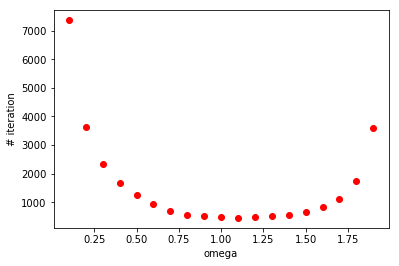

In [414]:
plt.figure()
plt.plot(x,y,'ro')
plt.xlabel('omega')
plt.ylabel('# iteration')
plt.show()

In [415]:
dat2 = [(j,sor_method(A,b, omega = j, maxit = 10000).i) for j in np.linspace(0.7,1.3,15)]

total iteration =  701
diff =  9.86262048882e-11
SSE =  3.75734271673e-17
total iteration =  632
diff =  9.95852253027e-11
SSE =  3.90352756799e-17
total iteration =  593
diff =  9.5718827768e-11
SSE =  3.0554969864e-17
total iteration =  541
diff =  9.83838694745e-11
SSE =  6.79008327114e-17
total iteration =  538
diff =  9.87193745242e-11
SSE =  2.56788398837e-17
total iteration =  498
diff =  9.82894267441e-11
SSE =  6.67750254964e-17
total iteration =  500
diff =  9.9725461057e-11
SSE =  2.09860710417e-17
total iteration =  476
diff =  9.39128589046e-11
SSE =  4.6035586437e-17
total iteration =  478
diff =  9.98118509541e-11
SSE =  1.82425388378e-17
total iteration =  462
diff =  9.51814041678e-11
SSE =  5.09843406492e-17
total iteration =  472
diff =  9.57024150573e-11
SSE =  2.00739660654e-17
total iteration =  461
diff =  9.84587724858e-11
SSE =  5.0568285984e-17
total iteration =  474
diff =  9.30208635468e-11
SSE =  4.25633161774e-17
total iteration =  490
diff =  9.7165058662

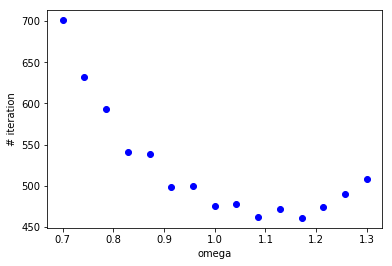

In [416]:
x = [i[0] for i in dat2]
y = [i[1] for i in dat2]
plt.figure()
plt.plot(x,y,'bo')
plt.xlabel('omega')
plt.ylabel('# iteration')
plt.show()

# Thomas Algorighm: Creating tridiagonal matrix

In [417]:
N = 10
A = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        if i == j:
            A[i,j] = 6
        if j == i+1:
            A[i,j] = -2
        if j == i-1:
            A[i,j] = -1
print(A)

[[ 6. -2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  6. -2.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  6. -2.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  6. -2.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  6. -2.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  6. -2.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  6. -2.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  6. -2.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  6. -2.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  6.]]


In [418]:
N = 10
a = np.array(N-1)
a = -1
b = np.array(N)
b = 6
c = np.array(N-1)
c = -2
A2 = sp.sparse.diags(diagonals = [a,b,c], offsets = [-1,0,1], shape = (N,N))
A2.todense()

matrix([[ 6., -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [-1.,  6., -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., -1.,  6., -2.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -1.,  6., -2.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0., -1.,  6., -2.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -1.,  6., -2.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., -1.,  6., -2.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  6., -2.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  6., -2.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  6.]])

In [419]:
A2

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements (3 diagonals) in DIAgonal format>

In [420]:
A2.data

array([[-1., -1., -1., -1., -1., -1., -1., -1., -1.,  0.],
       [ 6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.],
       [ 0., -2., -2., -2., -2., -2., -2., -2., -2., -2.]])

In [421]:
A2.offsets

array([-1,  0,  1], dtype=int32)

In [422]:
A2.data[0]

array([-1., -1., -1., -1., -1., -1., -1., -1., -1.,  0.])

In [423]:
A3 = sp.sparse.diags([[40]*6,[-1 * i for i in range(1,6)],[range(-20,-10,2)]],[0,1,-1],(6,6))
A3.todense()

matrix([[ 40.,  -1.,   0.,   0.,   0.,   0.],
        [-20.,  40.,  -2.,   0.,   0.,   0.],
        [  0., -18.,  40.,  -3.,   0.,   0.],
        [  0.,   0., -16.,  40.,  -4.,   0.],
        [  0.,   0.,   0., -14.,  40.,  -5.],
        [  0.,   0.,   0.,   0., -12.,  40.]])

In [424]:
A3.offsets

array([ 0,  1, -1], dtype=int32)

In [425]:
A3.data

array([[ 40.,  40.,  40.,  40.,  40.,  40.],
       [  0.,  -1.,  -2.,  -3.,  -4.,  -5.],
       [-20., -18., -16., -14., -12.,   0.]])

In [426]:
A3.data[1,0]

0.0

In [427]:
A3_sort = sorted(zip(A3.data,A3.offsets), key = lambda x: x[1])
A4 = np.array([i[0] for i in A3_sort])
A4

array([[-20., -18., -16., -14., -12.,   0.],
       [ 40.,  40.,  40.,  40.,  40.,  40.],
       [  0.,  -1.,  -2.,  -3.,  -4.,  -5.]])

In [428]:
a = A4[0] #A should start with 0, but it does not
b = A4[1]
c = A4[2] #C should not start with 0, but it does
print(a,'\n',b,'\n',c,'\n')

[-20. -18. -16. -14. -12.   0.] 
 [ 40.  40.  40.  40.  40.  40.] 
 [ 0. -1. -2. -3. -4. -5.] 



# Thomas method coding

In [429]:
def thomas(A,d):
    #imput: A = scipy.sparse.diags
    #input: d = array shape (N,)
    #output: x from Ax = d where x.shape is (N,)
    N = d.shape[0]
    #sorting array data based on the offsets
    A_sort = sorted(zip(A.data,A.offsets), key = lambda x: x[1])
    A_dat = np.array([i[0] for i in A_sort])
    a = np.empty(N)
    b = np.empty(N)
    c = np.empty(N)
    a[0] = 0
    a[1:] = A_dat[0,:-1]
    b = A_dat[1]
    c[-1] = 0
    c[:-1]= A_dat[2,1:]
    #move 0 to the first cell of A
    #move 0 to the last cell of C
    cp = np.empty(N)
    dp = np.empty(N)
    x = np.empty(N)
    cp[0] = c[0] / b[0]
    dp[0] = d[0] / b[0]
    for i in range(1,N-1):
        cp[i] = c[i] / (b[i]-a[i]*cp[i-1])
        dp[i] = (d[i] - a[i] * dp[i-1]) / (b[i]-a[i] * cp[i-1])
    i = N-1
    x[N-1] = (d[i] - a[i] * dp[i-1]) / (b[i]-a[i] * cp[i-1])
    for i in range(N-2,-1,-1):
        x[i] = dp[i] - cp[i] * x[i+1]
    return x

In [430]:
np.random.seed(1)
d = 10 * np.random.random(10)
d

array([ 4.17022005,  7.20324493,  0.00114375,  3.02332573,  1.46755891,
        0.92338595,  1.86260211,  3.45560727,  3.96767474,  5.38816734])

In [431]:
x = thomas(sp.sparse.dia_matrix(A),d)

In [432]:
A

array([[ 6., -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  6., -2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  6., -2.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  6., -2.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  6., -2.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  6., -2.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  6., -2.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  6., -2.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  6., -2.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  6.]])

In [433]:
A.dot(x)

array([ 4.17022005,  7.20324493,  0.00114375,  3.02332573,  1.46755891,
        0.92338595,  1.86260211,  3.45560727,  3.96767474,  5.38816734])

In [434]:
d

array([ 4.17022005,  7.20324493,  0.00114375,  3.02332573,  1.46755891,
        0.92338595,  1.86260211,  3.45560727,  3.96767474,  5.38816734])

In [435]:
A.dot(x) - d

array([ 0.,  0.,  0.,  0.,  0., -0., -0., -0., -0.,  0.])

# Test function with other matrix A and D

In [436]:
A3

<6x6 sparse matrix of type '<class 'numpy.float64'>'
	with 16 stored elements (3 diagonals) in DIAgonal format>

In [437]:
A3.todense()

matrix([[ 40.,  -1.,   0.,   0.,   0.,   0.],
        [-20.,  40.,  -2.,   0.,   0.,   0.],
        [  0., -18.,  40.,  -3.,   0.,   0.],
        [  0.,   0., -16.,  40.,  -4.,   0.],
        [  0.,   0.,   0., -14.,  40.,  -5.],
        [  0.,   0.,   0.,   0., -12.,  40.]])

In [438]:
np.random.seed(22)
d3 = np.random.random(6) * 3
d3

array([ 0.62538161,  1.44504319,  1.26161411,  2.577546  ,  0.51348466,
        1.01659188])

In [439]:
x3 = thomas(A3,d3)

In [440]:
x3

array([ 0.01682291,  0.04753462,  0.05994181,  0.09347838,  0.05063002,
        0.0406038 ])

In [441]:
A3.dot(x3) - d3

array([ 0.,  0., -0.,  0., -0.,  0.])

In [442]:
A3.dot(x3)

array([ 0.62538161,  1.44504319,  1.26161411,  2.577546  ,  0.51348466,
        1.01659188])

In [443]:
d3

array([ 0.62538161,  1.44504319,  1.26161411,  2.577546  ,  0.51348466,
        1.01659188])

In [444]:
from scipy.sparse import linalg

In [445]:
A3.todense()

matrix([[ 40.,  -1.,   0.,   0.,   0.,   0.],
        [-20.,  40.,  -2.,   0.,   0.,   0.],
        [  0., -18.,  40.,  -3.,   0.,   0.],
        [  0.,   0., -16.,  40.,  -4.,   0.],
        [  0.,   0.,   0., -14.,  40.,  -5.],
        [  0.,   0.,   0.,   0., -12.,  40.]])

In [446]:
sp_ans3 = linalg.spsolve(A3,d3)

/home/me/anaconda3/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:102: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


In [447]:
A3.dot(sp_ans3)

array([ 0.62538161,  1.44504319,  1.26161411,  2.577546  ,  0.51348466,
        1.01659188])

In [448]:
d3

array([ 0.62538161,  1.44504319,  1.26161411,  2.577546  ,  0.51348466,
        1.01659188])

# Re-create A3 in CSC sparse matrix format
```Compressed Sparse Column Format 
Compressed Sparse Row Format (CSR) is not covered (but it is similar)```
### Important attributes of csc matrix
data
<br>indices
<br>indptr

In [449]:
A3csc = A3.tocsc()

In [450]:
A3csc.data

array([ 40., -20.,  40.,  -1., -18.,  40.,  -2., -16.,  40.,  -3., -14.,
        40.,  -4., -12.,  40.,  -5.])

In [451]:
A3csc.data.shape

(16,)

In [452]:
A3csc.indices

array([0, 1, 1, 0, 2, 2, 1, 3, 3, 2, 4, 4, 3, 5, 5, 4], dtype=int32)

In [453]:
A3csc.indices.shape

(16,)

In [454]:
A3csc.indptr

array([ 0,  2,  5,  8, 11, 14, 16], dtype=int32)

In [455]:
A3csc.indptr.shape

(7,)

In [456]:
A3csc.todense()

matrix([[ 40.,  -1.,   0.,   0.,   0.,   0.],
        [-20.,  40.,  -2.,   0.,   0.,   0.],
        [  0., -18.,  40.,  -3.,   0.,   0.],
        [  0.,   0., -16.,  40.,  -4.,   0.],
        [  0.,   0.,   0., -14.,  40.,  -5.],
        [  0.,   0.,   0.,   0., -12.,  40.]])

## data (`.data`) is the non-zero value in sparse matrix
A3csc.data = [ 40., -20.,  40.,  -1., -18.,  40.,  -2., -16.,  40.,  -3., -14.,
        40.,  -4., -12.,  40.,  -5.]
## indices (`.indicies`) tell the row that the data belong
A3csc.indices = [0, 1, 1, 0, 2, 2, 1, 3, 3, 2, 4, 4, 3, 5, 5, 4]
## index pointer (`.indptr`) tell how to split the data before applying the row index
A3csc.indptr = [ 0,  2,  5,  8, 11, 14, 16] means

## Explanation
### For the first column, look at A3csc.indptr
<br>1st column pointer is [0:2] (start from 0 to 2 but exclude 2)
<br>Use this index for the data
<br>A3csc.data[0:2] = [40, -20]
<br>The corresponding row is
<br>A3csc.indices[0:2] = [0, 1]
<br>This is for the first column
<br>Thus, for the first column we have 40 in row 0, and -20 in row 1
### For the second column, look at A3csc.indptr
<br>2nd column pointer is [2:5] (start from 2 to 5 but exclude 5)
<br>Use this index for the data
<br>A3csc.data[2:5] = [ 40.,  -1., -18.]
<br>The corresponding row is
<br>A3csc.indices[2:5] = [1, 0, 2]
<br>This is for the first column
<br>Thus, for the first column we have 40 in row 1, and -1 in row 0, and -18 in row 2


In [457]:
ptr = A3csc.indptr
dat = A3csc.data
rix = A3csc.indices

print('data in each column')
for i in range(ptr.shape[0]-1):
    print('column = {:1d} '.format(i), dat[ptr[i]:ptr[i+1]])
    print('row index =', rix[ptr[i]:ptr[i+1]])

data in each column
column = 0  [ 40. -20.]
row index = [0 1]
column = 1  [ 40.  -1. -18.]
row index = [1 0 2]
column = 2  [ 40.  -2. -16.]
row index = [2 1 3]
column = 3  [ 40.  -3. -14.]
row index = [3 2 4]
column = 4  [ 40.  -4. -12.]
row index = [4 3 5]
column = 5  [ 40.  -5.]
row index = [5 4]


In [458]:
A3csc.todense()

matrix([[ 40.,  -1.,   0.,   0.,   0.,   0.],
        [-20.,  40.,  -2.,   0.,   0.,   0.],
        [  0., -18.,  40.,  -3.,   0.,   0.],
        [  0.,   0., -16.,  40.,  -4.,   0.],
        [  0.,   0.,   0., -14.,  40.,  -5.],
        [  0.,   0.,   0.,   0., -12.,  40.]])

# sparse matrix solver

In [459]:
sparse_ans = linalg.spsolve(A3csc,d3)

In [460]:
sparse_ans

array([ 0.01682291,  0.04753462,  0.05994181,  0.09347838,  0.05063002,
        0.0406038 ])

In [461]:
A3csc.dot(sparse_ans)

array([ 0.62538161,  1.44504319,  1.26161411,  2.577546  ,  0.51348466,
        1.01659188])

In [462]:
d3

array([ 0.62538161,  1.44504319,  1.26161411,  2.577546  ,  0.51348466,
        1.01659188])

# User Thomas algorithm

In [463]:
thomas(A3,d3)

array([ 0.01682291,  0.04753462,  0.05994181,  0.09347838,  0.05063002,
        0.0406038 ])

# Solve as dense matrix

In [464]:
A3_dense = A3.todense()
sp.linalg.solve(A3_dense,d3)

array([ 0.01682291,  0.04753462,  0.05994181,  0.09347838,  0.05063002,
        0.0406038 ])

# Solve time comparison

In [465]:
%%timeit -n 5
thomas(A3,d3)

5 loops, best of 3: 38.5 µs per loop


In [466]:
%%timeit -n 5
linalg.spsolve(A3csc,d3)

5 loops, best of 3: 52.1 µs per loop


In [467]:
%%timeit -n 5
sp.linalg.solve(A3_dense,d3)

5 loops, best of 3: 63.5 µs per loop


Note that spsolve can solve any sparse matrix, but thomas just solve tri-diagonal matrix (with the input in diagonal sparse matrix format.